In [6]:
library(here)
library(glue)
library(tidyverse)
library(broom)
library(ggrepel)
library(latex2exp)
library(patchwork)
library(Metrics)
library(data.table)
library(bdkn)


Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse



In [2]:
# Near East populations to exclude from the plots containing Europeans
near_east <- c("BedouinB", "Yemenite_Jew", "Palestinian", "Iraqi_Jew", "Jordanian", "Druze", "Iranian", "Samaritan")
ignore_samples <- near_east

In [106]:
nea_est <- readRDS(here("data/rds/nea_estimates.rds")) %>%
    filter(X %notin% ignore_samples,
           stat == "admixture_prop" | stat == "indirect_f4" | C == "Dinka",
           pop %in% c("EMH", "WestEurasia"))

# Fig. 1 get the code here

## EMH basal Eurasian signal

In [3]:
basal_eur <- readRDS(here("data/rds/array_basal_eur.rds"))

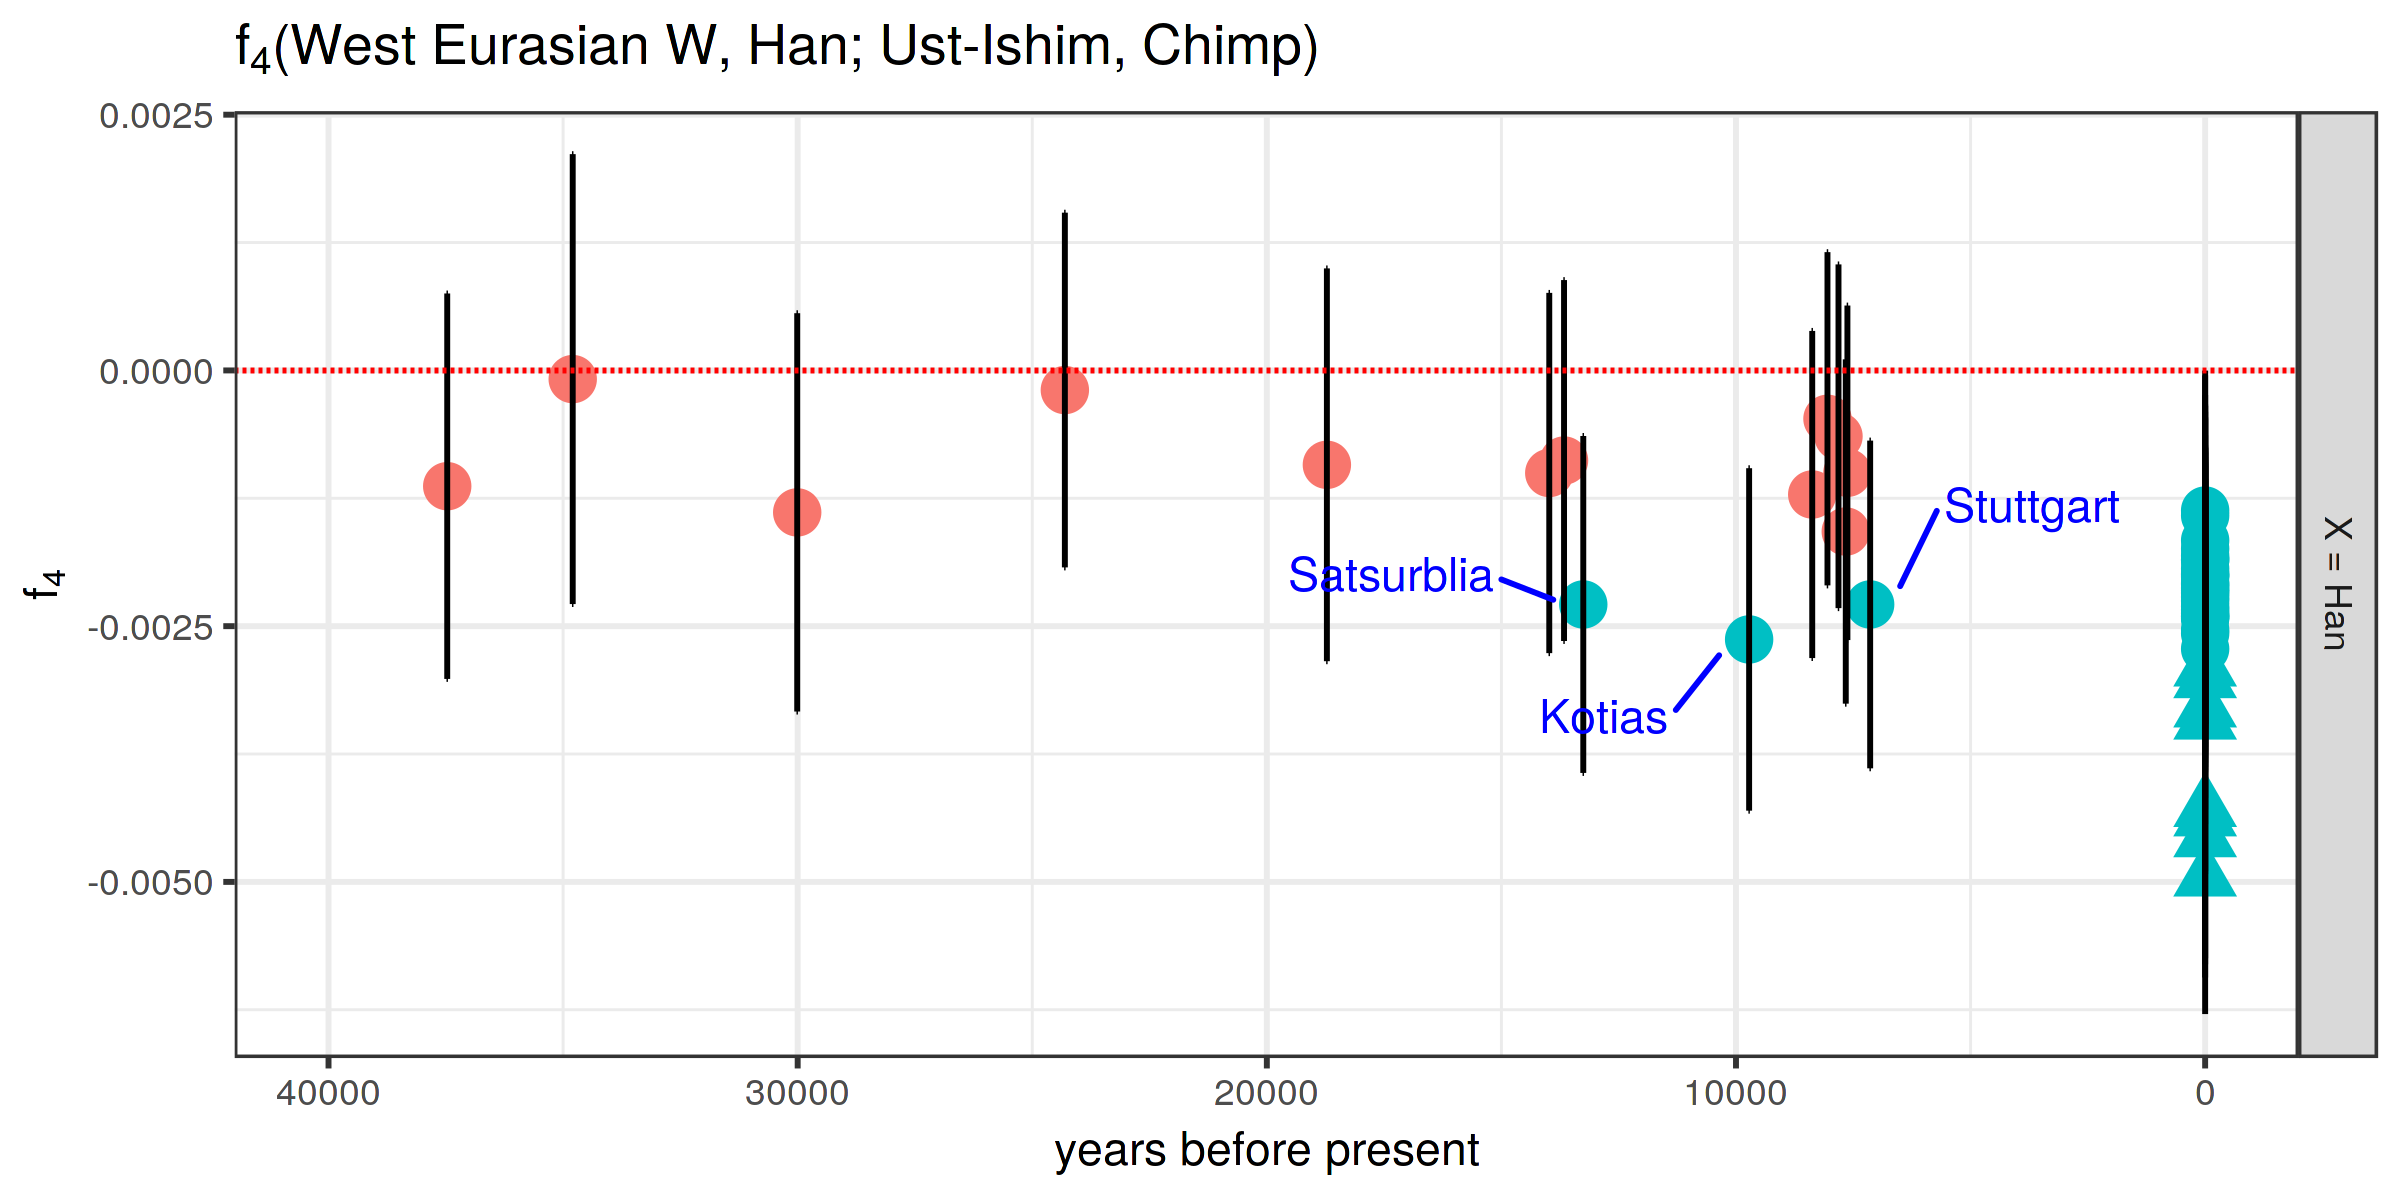

In [4]:
set_dim(8, 4, 300)

basal_eur %>% filter(X == "Han", snp_count > 500000) %>%
mutate(lbl = ifelse(W %in% c("Stuttgart", "Satsurblia", "Kotias"), W, ""),
       X = paste("X =", X)) %>% 
  ggplot(aes(age, f4)) +
  geom_point(aes(shape = W %in% near_east, color = abs(Zscore) > 3), size = 5) +
  geom_errorbar(aes(ymin = f4 - 3 * stderr, ymax = f4 + 3 * stderr)) +
  geom_hline(yintercept = 0, linetype = 2, color = "red") +
  geom_text_repel(aes(label = lbl), box.padding = 0.35, point.padding = 1, color = "blue") +
  ggtitle(TeX("$f_4$(West Eurasian W, Han; Ust-Ishim, Chimp)")) +
  theme_bw() +
  theme(legend.position = "none") +
  facet_grid(X ~ .) +
  xlim(40000, 0) + xlab("years before present") + ylab(TeX("$f_4$"))

ggsave(here("figures/figS1_basal_eurasian_over_time.png"), width = 8, height = 4, units = "in")

## Whole-genome basal Eurasian analysis

In [59]:
nea_be <- readRDS(here("data/rds/whole_genome_nea_be.rds"))

t.test(alpha ~ group, nea_be)
t.test(f4 ~ group, nea_be)


	Welch Two Sample t-test

data:  alpha by group
t = -6.4491, df = 13.805, p-value = 1.631e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.003353989 -0.001678205
sample estimates:
           mean in group Near East mean in group other West Eurasians 
                        0.01762713                         0.02014322 



	Welch Two Sample t-test

data:  f4 by group
t = -5.6959, df = 7.8442, p-value = 0.0004904
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0005842207 -0.0002466682
sample estimates:
           mean in group Near East mean in group other West Eurasians 
                     -0.0009560000                      -0.0005405556 


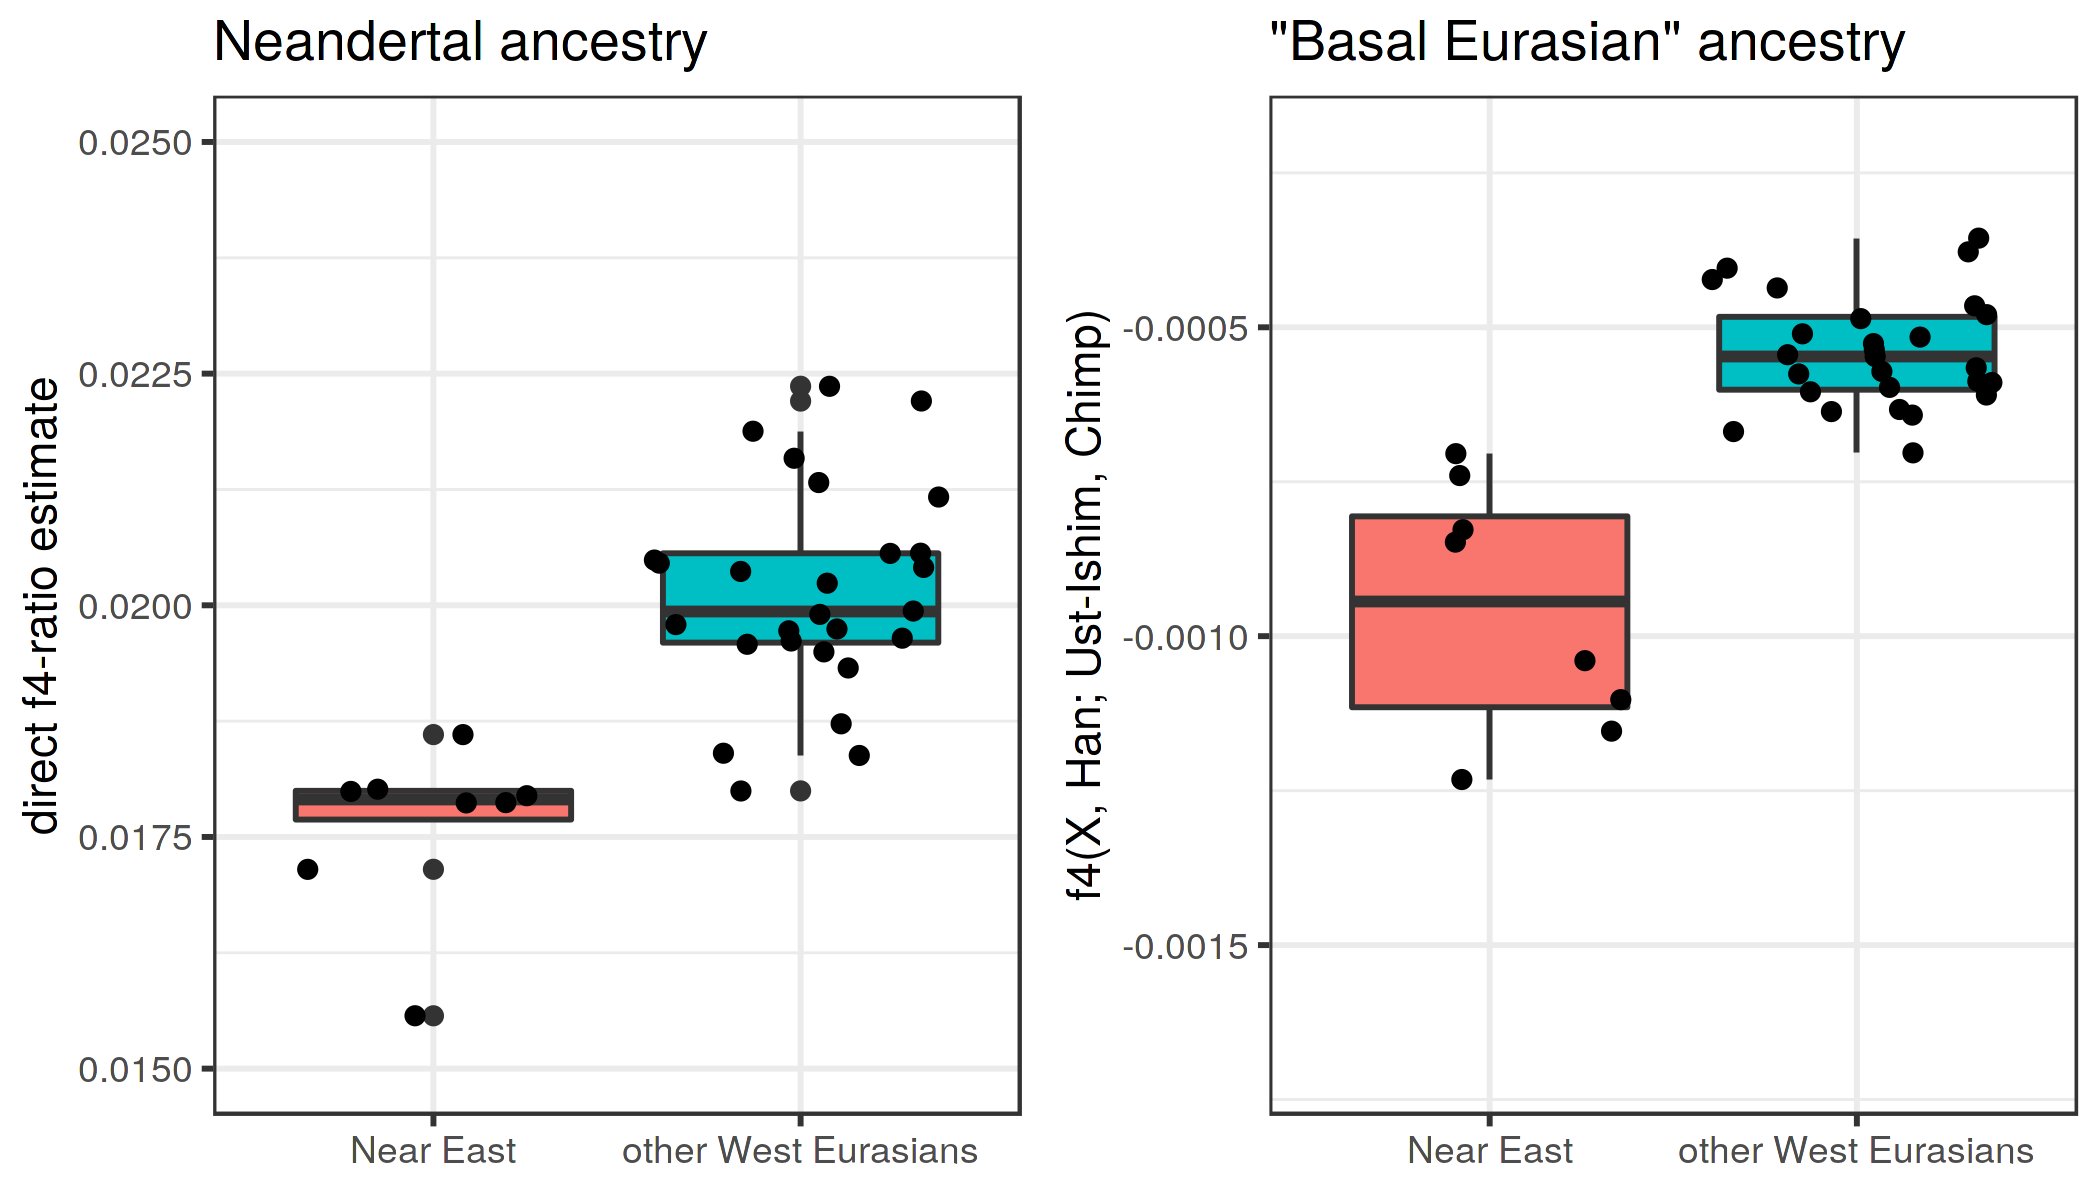

In [61]:
#summary(lm(data = filter(nea_be, !name %in% near_east), alpha ~ f4))
#filter(nea_be, !name %in% near_east) %>%
#  ggplot(aes(f4, alpha)) +
#  geom_point() +
#  geom_smooth(method = "lm", linetype = 5, color = "black", aes(group = 1)) +
#  geom_text_repel(color = "black", aes(label = name), box.padding = 3, point.padding = 1, alpha = 1/5) +
#  theme_bw() + theme(legend.position = "bottom") +
#  xlab("f4(European, Han; Ust-Ishim, Chimp)") + ylim(0.01, 0.03) +
#  ylab("Neandertal ancestry (direct f4-ratio)") +
#ggsave(here("figures/figS3_basal_eurasian_vs_nea_europe.png"), width = 8, height = 5, units = "in")

nea_dist_p <- ggplot(nea_be, aes(group, alpha, fill = group)) +
  geom_boxplot() + geom_jitter() +
  theme_bw() + theme(legend.position = "none") +
  ylab("direct f4-ratio estimate") +
  ggtitle("Neandertal ancestry") +
  ylim(0.015, 0.025) + theme(axis.title.x = element_blank())

be_dist_p <- ggplot(nea_be, aes(group, f4, fill = group)) +
  geom_boxplot() + geom_jitter() +
  theme_bw() + theme(legend.position = "none") +
  ylab("f4(X, Han; Ust-Ishim, Chimp)") +
  ggtitle("\"Basal Eurasian\" ancestry") +
  ylim(-0.0017, -0.0002) + theme(axis.title.x = element_blank())

set_dim(7, 4, 300)
nea_dist_p + be_dist_p

ggsave(here("figures/figS4_near_east_vs_europe.png"), width = 8, height = 5, units = "in")

## Affinities over time to different SGDP populations

In [31]:
affinity_dstats_chimp_ui <- readRDS(here("data/rds/affinity_dstats_chimp_ui.rds"))

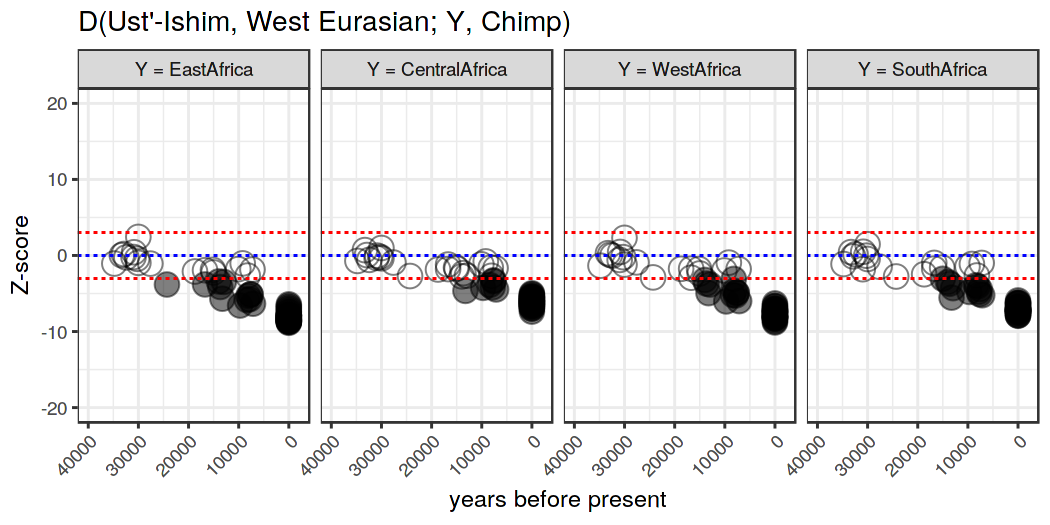

In [50]:
set_dim(7, 3.5)

affinity_dstats_chimp_ui %>% 
  filter(Y %in% c("EastAfrica", "CentralAfrica", "WestAfrica", "SouthAfrica"), 
         nsnps > 50000,
         X %notin% near_east) %>%
  mutate(Y = paste("Y =", Y)) %>% 
  mutate(Y = factor(Y, levels = c("Y = EastAfrica", "Y = CentralAfrica", "Y = WestAfrica", "Y = SouthAfrica"))) %>%
ggplot(aes(age, Zscore)) + geom_point(aes(shape = abs(Zscore) > 3), size = 5, alpha = 1/2) +
  geom_hline(yintercept = 0, linetype = 2, color = "blue") +
  geom_hline(yintercept = c(-3, 3), linetype = 2, color = "red") +
  xlim(40000, -2000) + ylim(-20, 20) +
  facet_grid(. ~ Y) +
  xlab("years before present") + ylab("Z-score") +
  ggtitle("D(Ust'-Ishim, West Eurasian; Y, Chimp)") +
  scale_shape_manual(values = c(21, 19)) +
  theme_bw() + theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

ggsave(here("figures/fig2_african_affinities_ui_chimp.png"),
       width = 7, height = 3.5, units = "in")

In [116]:
affinity_dstats_sa_ui <- readRDS(here("data/rds/affinity_dstats_sa_ui.rds"))

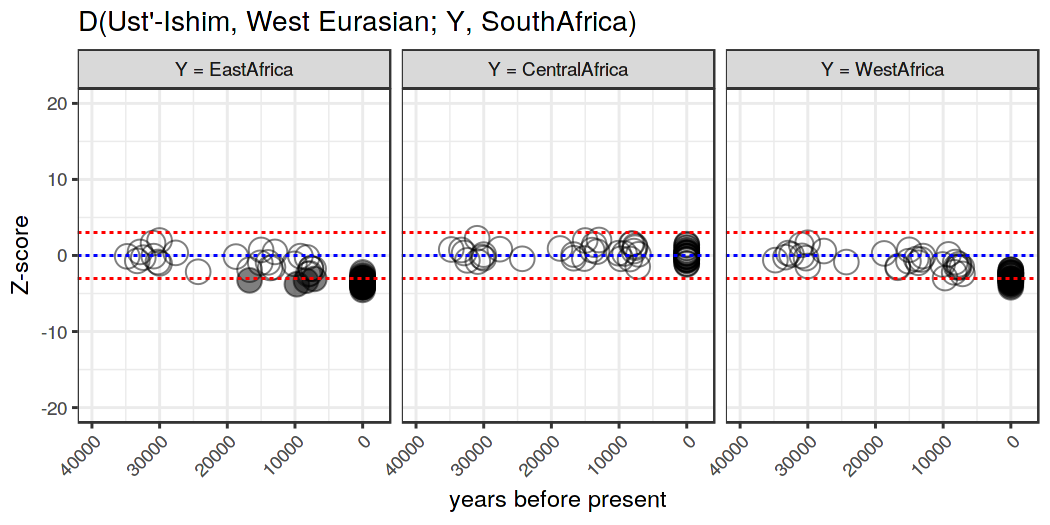

In [49]:
set_dim(7, 3.5)

affinity_dstats_sa_ui %>% 
  filter(Y %in% c("EastAfrica", "CentralAfrica", "WestAfrica"), 
         nsnps > 50000) %>%
  mutate(Y = paste("Y =", Y)) %>% 
  mutate(Y = factor(Y, levels = c("Y = EastAfrica", "Y = CentralAfrica", "Y = WestAfrica", "Y = Oceania"))) %>%
  ggplot(aes(age, Zscore)) + geom_point(aes(shape = abs(Zscore) > 3), size = 5, alpha = 1/2) +
  geom_hline(yintercept = 0, linetype = 2, color = "blue") +
  geom_hline(yintercept = c(-3, 3), linetype = 2, color = "red") +
  xlim(40000, -2000) + ylim(-20, 20) +
  facet_grid(. ~ Y) +
  xlab("years before present") + ylab("Z-score") +
  ggtitle("D(Ust'-Ishim, West Eurasian; Y, SouthAfrica)") +
  scale_shape_manual(values = c(21, 19)) +
  theme_bw() + theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

ggsave(here("figures/affinity_dstats_sa_ui.png"), width = 7, height = 3.5, units = "in")

## SLiM trajectory average

In [86]:
mutations <- readRDS(here("data/rds/mutations.rds"))

mutation_traj <- mutations %>%
  filter(mut_type %in% c("gap_marker", "region_marker")) %>% 
  group_by(gen, rep, mut_type) %>%
  summarise(avg_nea=mean(freq)) %>%
  group_by(gen, mut_type) %>%
  summarise(mean_rep=mean(avg_nea), sd_rep=sd(avg_nea), n_rep=n()) %>%
  mutate(se_rep=sd_rep / sqrt(n_rep),
         lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
         upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep)

In [108]:
both_f4 <- filter(nea_est,
                 stat %in% c("indirect_f4", "direct_f4"),
                 snp_count > 200000) %>%
  mutate(gen = 2200 - age/25)

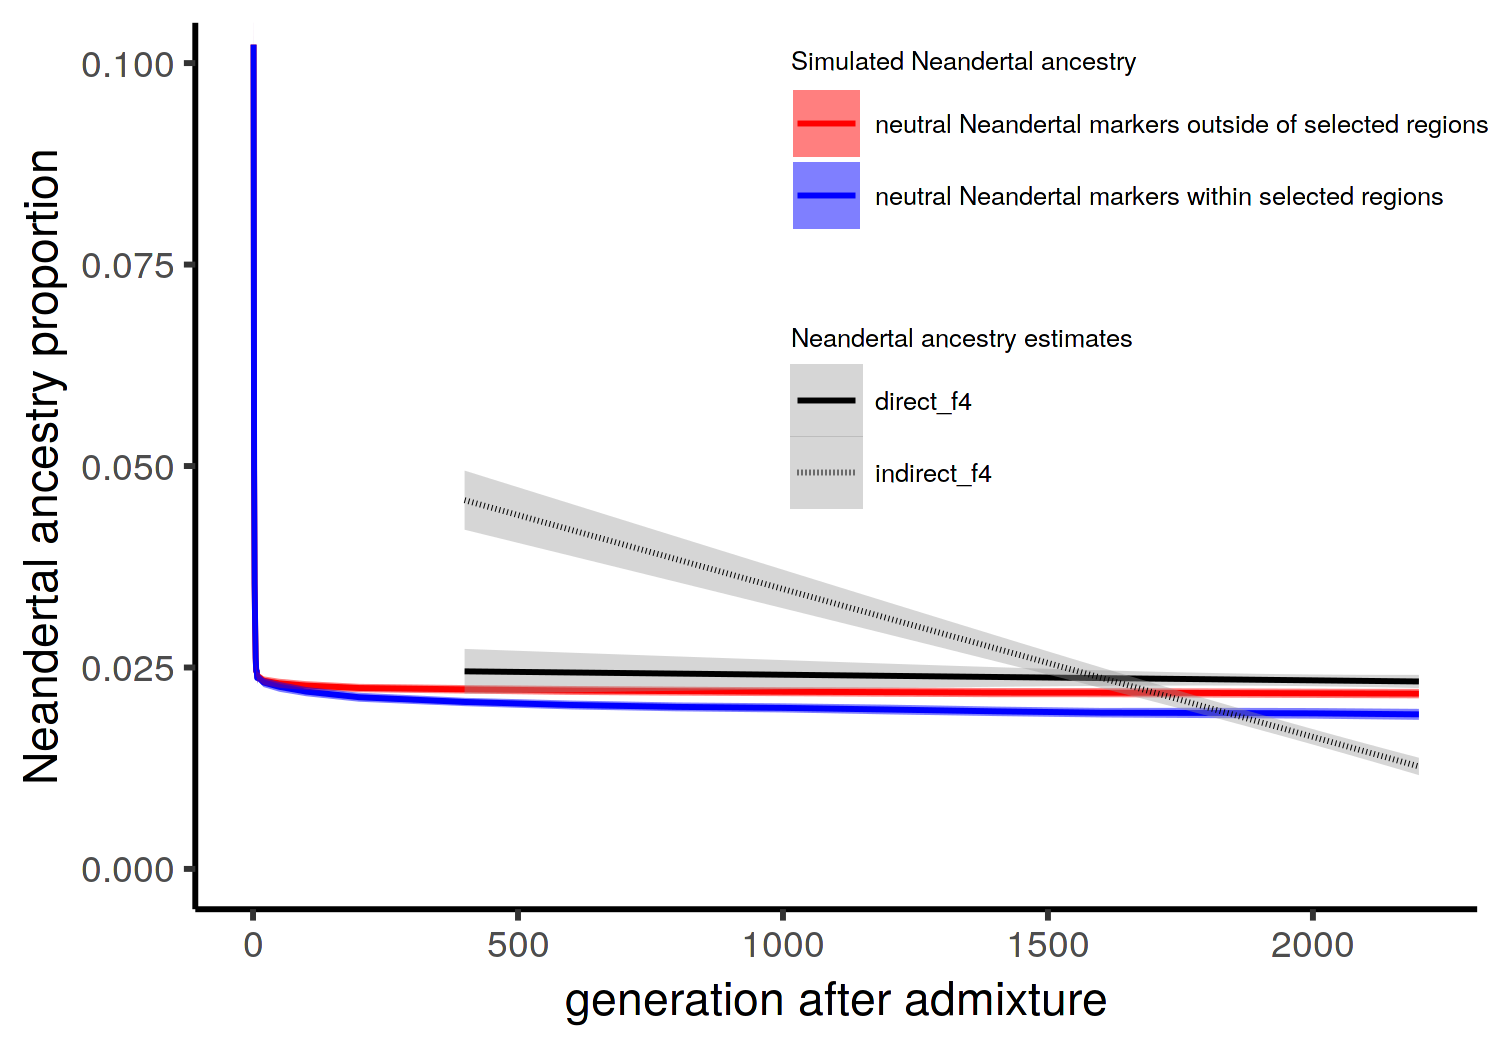

In [109]:
set_dim(5, 3.5, 300)

p1 <- ggplot(mutation_traj, aes(gen, mean_rep)) +
  geom_line(size = 0.5, aes(color=mut_type, group = mut_type)) +
  geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, color=mut_type, group = mut_type, fill = mut_type), color = NA, alpha=1/2) +
  xlab("generation after admixture") + ylab("Neandertal ancestry proportion") +
  coord_cartesian(y=c(0, 0.1))

p1a <- geom_smooth(data=both_f4, 
                   mapping=aes(x = gen, y = alpha, weight=snp_count, lty=stat), inherit.aes = FALSE,
              method='lm', color='black', size=.5)

p_traj <- p1 + p1a + theme_classic() +
  theme(legend.position = c(1,1), legend.justification = c(1,1), 
        legend.text = element_text(size=6), 
        legend.title = element_text(size=6)) +
  scale_color_manual("Simulated Neandertal ancestry",
                     values = c("red", "blue"),
                     labels = c("neutral Neandertal markers outside of selected regions", 
                                "neutral Neandertal markers within selected regions")) +
  scale_fill_manual("Simulated Neandertal ancestry",
                     values = c("red", "blue"),
                     labels= c("neutral Neandertal markers outside of selected regions", 
                               "neutral Neandertal markers within selected regions")) +
scale_linetype_manual("Neandertal ancestry estimates",
                   values = c(1, 3))

p_traj

ggsave(here("figures/fig4b_SLiM_vs_f4.png"), width = 5, height = 3.5)

## Efficacy of negative selection vs distance to functional regions

In [11]:
bin_props <- readRDS(here("data/rds/depletion_near_genes.rds"))

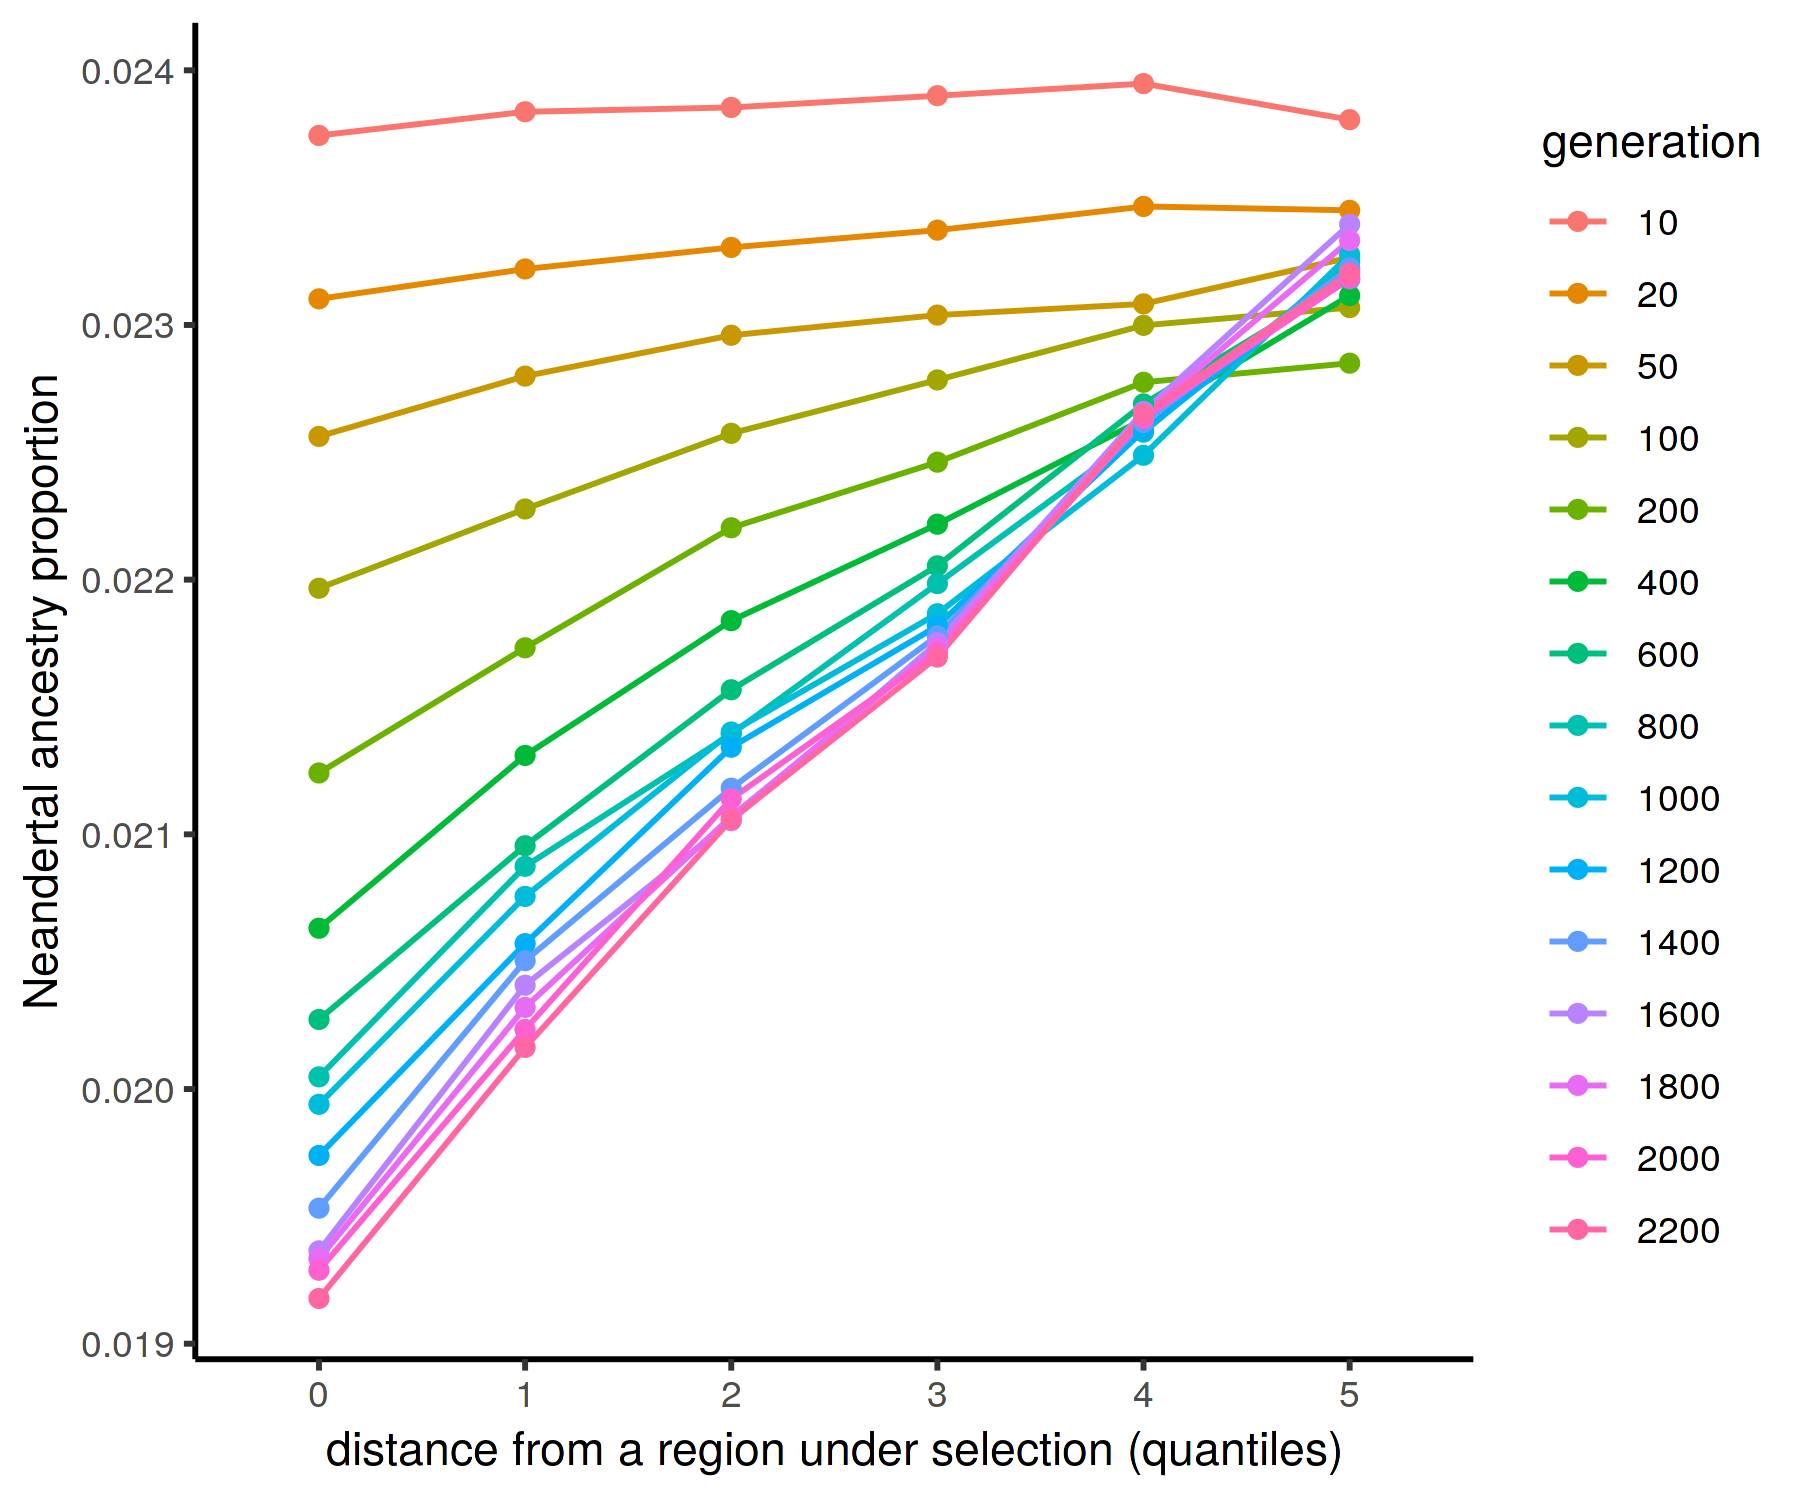

In [12]:
set_dim(6, 5, 300)

p_bins <- bin_props %>%
  group_by(dist_bin, gen) %>%
  summarise(nea_prop = mean(nea_prop)) %>%
ggplot(aes(x=dist_bin, y=nea_prop, group=gen, color=as.factor(gen))) +
  geom_line() + 
  geom_point() +
  theme_classic() +
  xlab("distance from a region under selection (quantiles)") +
  ylab("Neandertal ancestry proportion") +
  scale_color_discrete(name = "generation")

p_bins

ggsave(here("figures/fig4c_depletion_near_exons.png"), width = 6, height = 5, units = "in")

In [13]:
lm_fun <- function(df) cor.test(as.numeric(df$dist_bin), df$nea_prop, method = "pearson")

In [14]:
model_props <- bin_props %>%
    group_by(gen, chr) %>%
    nest %>%
    mutate(model = map(data, lm_fun),
           stats = map(model, glance)) %>%
    unnest(stats, .drop = TRUE)

In [15]:
model_props %>%
    group_by(gen) %>%
    summarise(mean(estimate)) %>%
    filter(gen %in% c(10, 400, 2200))

gen  mean(estimate)
1   10 0.02620393    
2  400 0.79956745    
3 2200 0.95959651

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


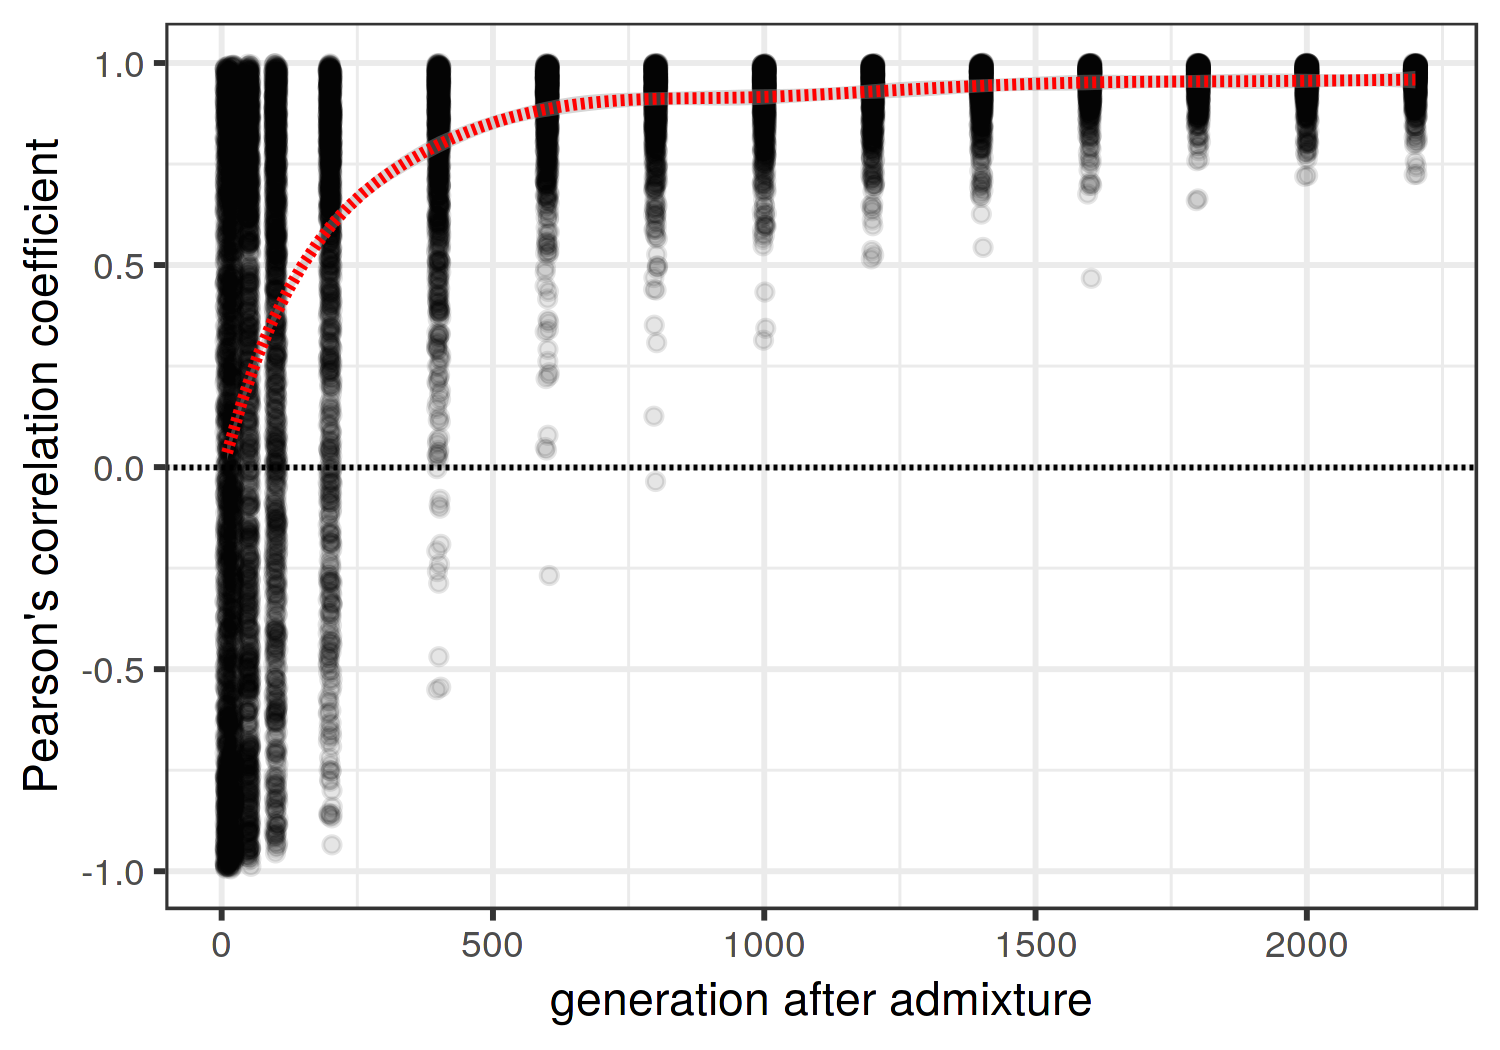

In [71]:
set_dim(5, 3.5, 300)

model_props %>%
    ggplot(aes(gen, estimate)) +
        geom_jitter(alpha = 1/10) +
        geom_smooth(linetype = 2, color = "red") +
        geom_hline(yintercept = 0, linetype = 2, color = "black") +
        xlab("generation after admixture") +
        ylab("Pearson's correlation coefficient") +
        theme_bw()

ggsave(here("figures/figS9_depletion_near_exons_correlation.png"), width = 8, height = 5, units = "in")

## Deltas of allele frequencies over time

In [17]:
deltas <- readRDS(here("data/rds/mutation_deltas.rds"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


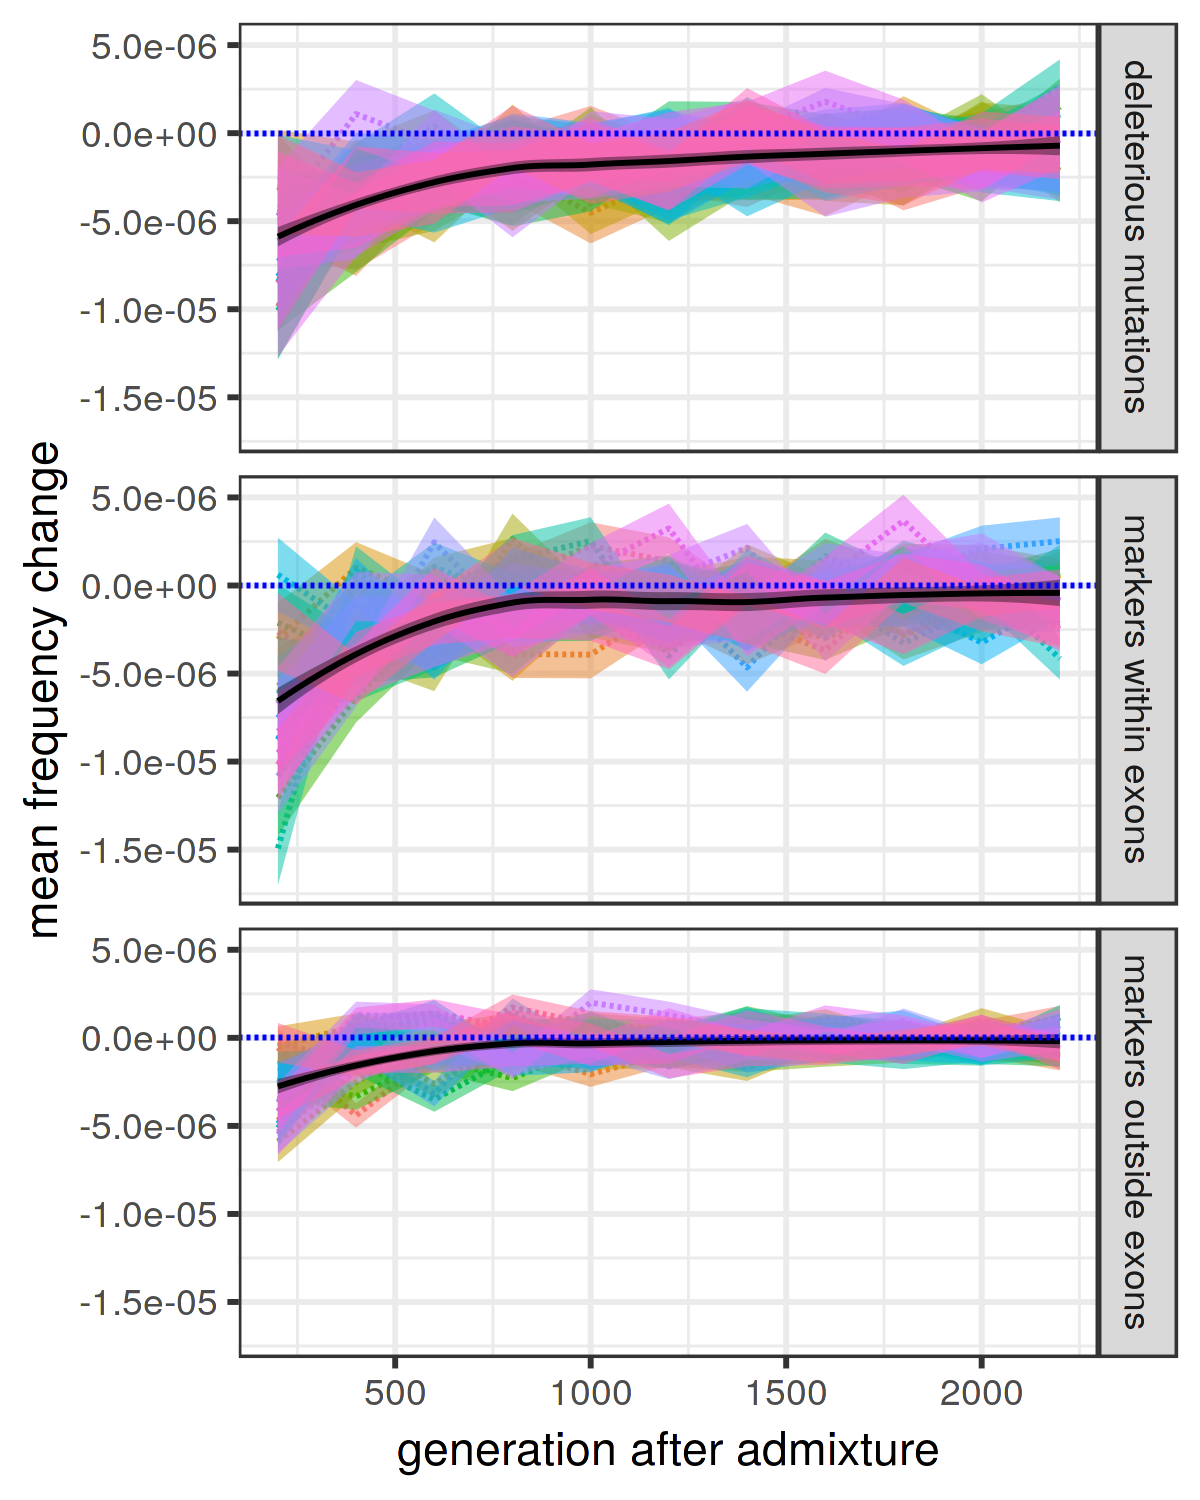

In [18]:
set_dim(4, 5, 300)

p_deltas <- group_by(deltas, g, mut_type, rep) %>%    
  summarise(avg_delta=mean(delta_f), sd_delta=sd(delta_f), n_delta=n()) %>%
  mutate(se_delta=sd_delta / sqrt(n_delta),
         lower_ci=avg_delta - qt(1 - (0.05 / 2), n_delta - 1) * se_delta,
         upper_ci=avg_delta + qt(1 - (0.05 / 2), n_delta - 1) * se_delta) %>% 
  filter(g >= 200) %>% 
  ungroup %>% 
  filter(mut_type %in% c("gap_marker", "region_marker", "Nea_del")) %>% 
  mutate(mut_type=case_when(mut_type == "MH_del" ~ "MH deleterious",
                            mut_type == "Nea_del" ~ "deleterious mutations",
                            mut_type == "gap_marker" ~ "markers outside exons",
                            mut_type == "region_marker" ~ "markers within exons")) %>% 
  mutate(mut_type = factor(mut_type, levels = c("deleterious mutations",
                                                "markers within exons",
                                                "markers outside exons"))) %>% 
ggplot(aes(g, avg_delta)) +
  geom_line(aes(color=rep), linetype = 2, size = 0.5) +
  geom_ribbon(aes(g, ymin=lower_ci, ymax=upper_ci, fill=rep), alpha=1/2) +
  geom_smooth(fill="black", color = "black", size = 0.5, se = TRUE) + 
  geom_hline(yintercept=0, linetype=2, color = "blue") +
  facet_grid(mut_type ~ .) + 
  xlab("generation after admixture") + ylab("mean frequency change") +
  theme_bw() +
  theme(legend.position="none")

p_deltas

ggsave(here("figures/fig4d_mutation_deltas.png"), width = 4, height = 5, units = "in")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in (function (..., na.rm = FALSE) :
“an argument will be fractionally recycled”

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in (function (..., na.rm = FALSE) :
“an argument will be fractionally recycled”

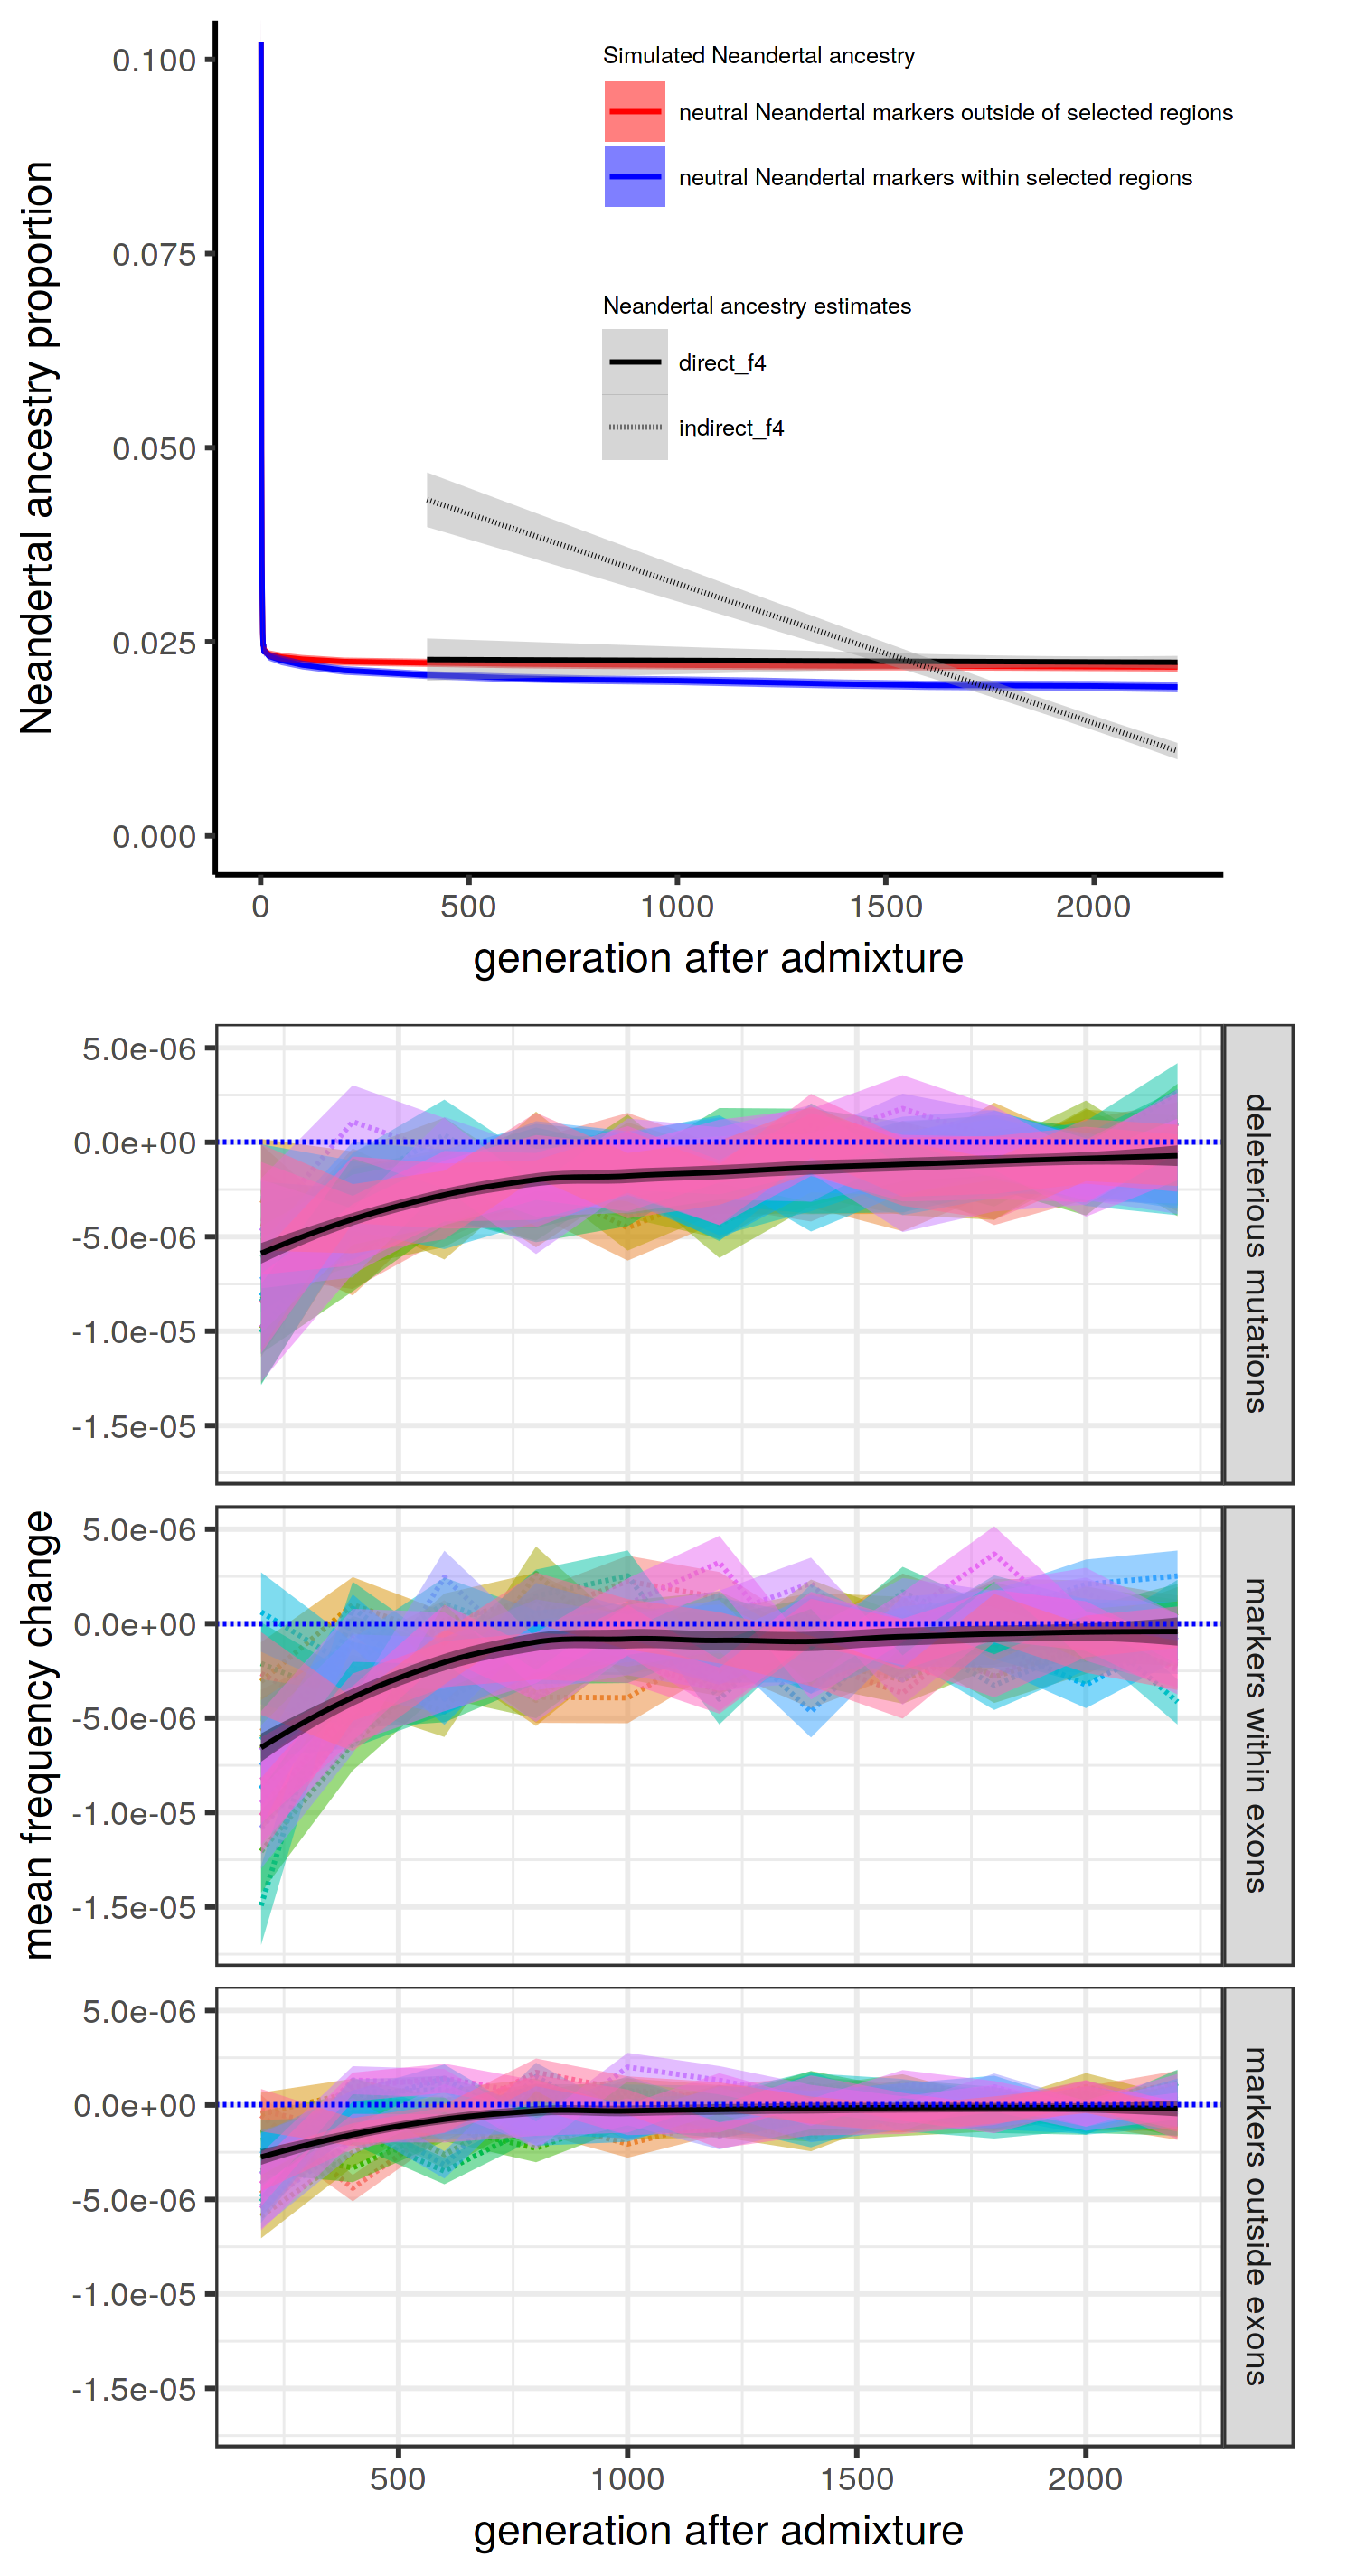

In [57]:
set_dim(5, 9.5, 300)

p_traj / p_deltas + plot_layout(ncol = 1, heights = c(1.2, 2))

ggsave(here("figures/fig4bd.png"), width = 5, height = 9.5, units = "in")

## RMSE of direct vs indirect f4-ratios to SLiM trajectories

In [113]:
direct_f4 <- filter(both_f4, stat == "direct_f4")
indirect_f4 <- filter(both_f4, stat == "indirect_f4")
slim_nea <- filter(mutation_traj, mut_type == "gap_marker", gen >= min(both_f4$gen))

direct_lm <- lm(alpha ~ gen, direct_f4)
indirect_lm <- lm(alpha ~ gen, indirect_f4)
slim_lm <- lm(mean_rep ~ gen, slim_nea)

sample_ages <- direct_f4$gen

pred_direct <- predict(direct_lm, data.frame(gen=sample_ages))
pred_indirect <- predict(indirect_lm, data.frame(gen=sample_ages))
pred_slim <- predict(slim_lm, data.frame(gen=sample_ages))

In [114]:
(direct_rmse <- rmse(pred_slim, pred_direct))
(indirect_rmse <- rmse(pred_slim, pred_indirect))

indirect_rmse / direct_rmse

[1] 0.001569855

[1] 0.009336726

[1] 5.947509

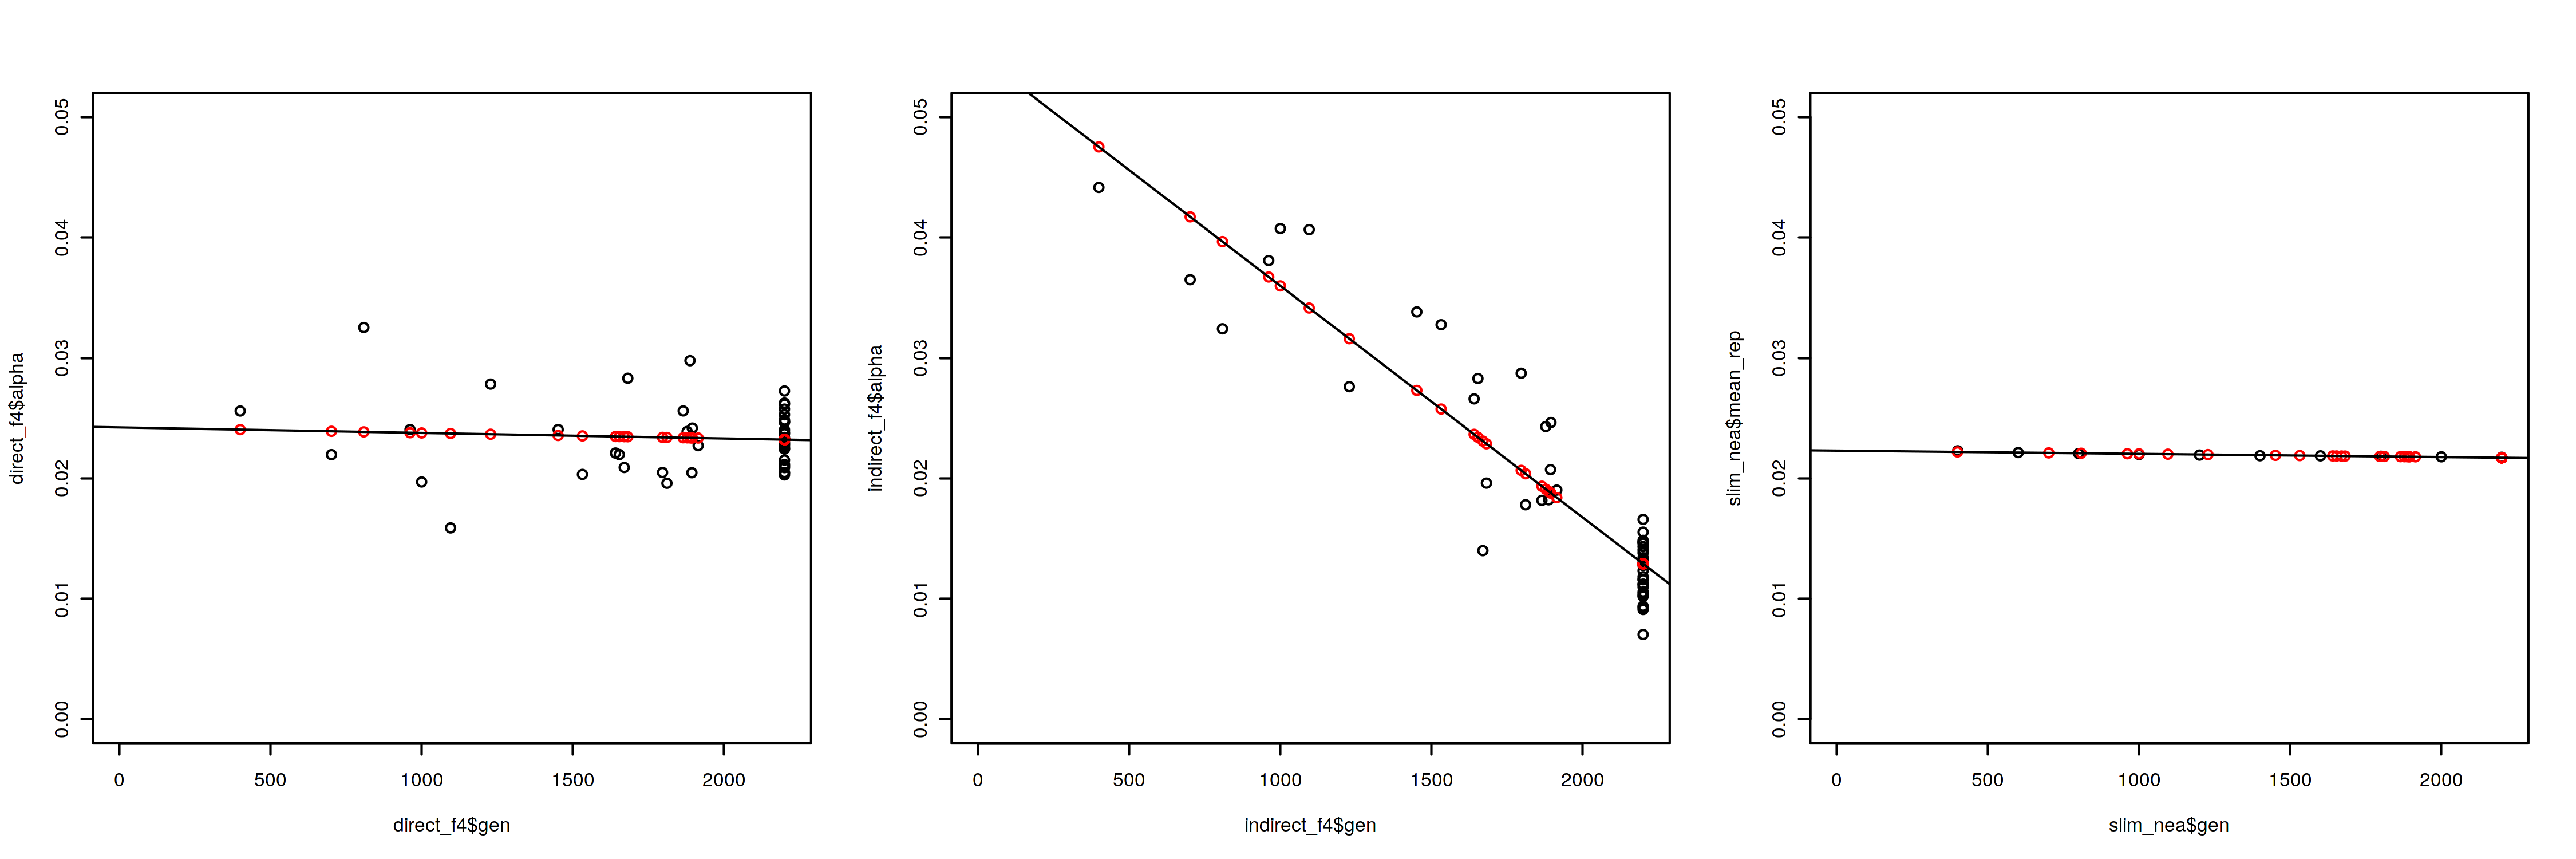

In [112]:
set_dim(15, 5, 300)

par(mfrow=c(1, 3)) 

plot(direct_f4$gen, direct_f4$alpha, xlim = c(0, 2200), ylim = c(0, 0.05))
points(direct_f4$gen, pred_direct, col = "red")
abline(direct_lm)

plot(indirect_f4$gen, indirect_f4$alpha, xlim=c(0, 2200), ylim=c(0, 0.05))
points(indirect_f4$gen, pred_indirect, col = "red")
abline(indirect_lm)

plot(slim_nea$gen, slim_nea$mean_rep, xlim=c(0, 2200), ylim=c(0, 0.05))
points(direct_f4$gen, pred_slim, col = "red")
abline(slim_lm)

<br><br><br><br><br>
# Testing robustness of admixture statistics

In [15]:
read_sims <- function(scenario) {
    list.files(here("data/msprime_sims"), scenario %+% ".*.tsv", full.names = TRUE) %>% 
        map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(scenario = scenario)) %>%
        gather(stat, value, -c(name, age, post_admixture, scenario))
}

In [11]:
coal_nea <- map_dfr("symmetry_" %+% c("no_migration", "eur_to_afr", "afr_to_eur", "both_directions"), read_sims) %>%
    filter(stat != "d_stat") %>%
    mutate(scenario = case_when(scenario == "symmetry_afr_to_eur" ~ "A",
                                scenario == "symmetry_both_directions" ~ "B",
                                scenario == "symmetry_eur_to_afr" ~ "C",
                                scenario == "symmetry_no_migration" ~ "D")) %>%
    mutate(stat = case_when(stat == "admix_prop" ~ "admixture array",
                            stat == "direct_f4" ~ "direct f4-ratio",
                            stat == "indirect_f4" ~ "indirect f4-ratio",
                            stat == "true_prop" ~ "true ancestry")) %>% 
    group_by(name, age, post_admixture, scenario, stat) %>%
    summarise(value = mean(value))

Warning message:
“Removed 160 rows containing non-finite values (stat_smooth).”

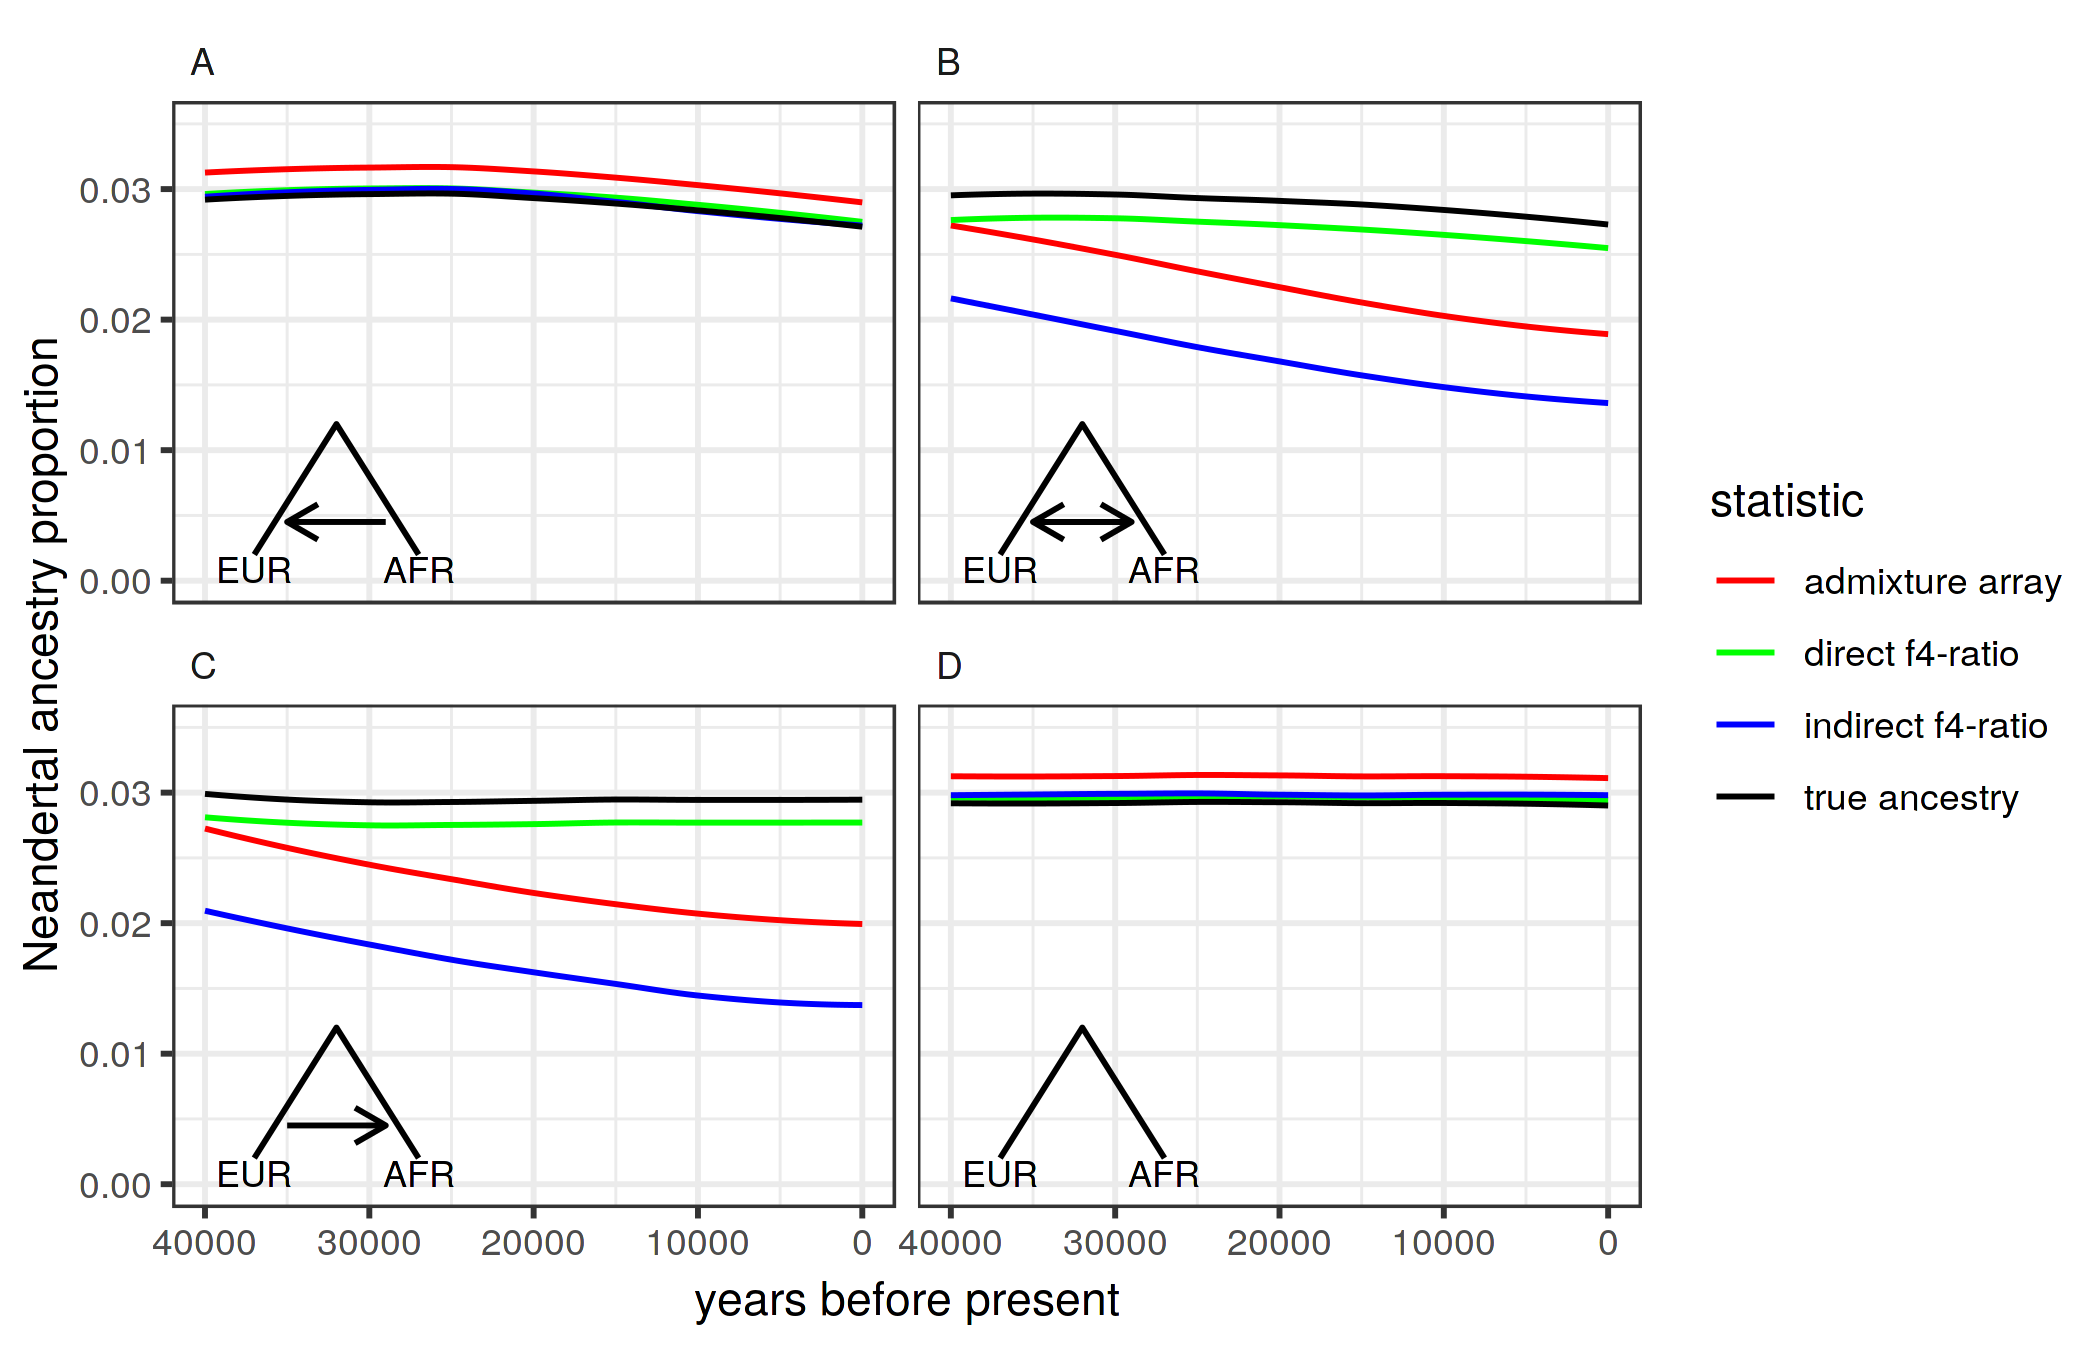

In [12]:
set_dim(7, 4.5, 300)

ggplot(coal_nea, aes(age, value)) +
    geom_smooth(aes(color = stat), method = "loess", se = FALSE, size = 0.5) +
    facet_wrap(~ scenario, ncol = 2) + 
    coord_cartesian(ylim = c(0,.035)) + xlim(40000, 0) +
    scale_size_manual("statistic", values = c(1, 1, 1, 0.5)) +
    scale_linetype_manual("statistic", values = c(2, 3, 4, 1)) +
    scale_color_manual("statistic", values = c("red", "green", "blue", "black")) +
    theme_bw() +
    geom_path(data = tibble(age = c(4e4, 3.5e4, 3e4) - 3e3,
                              value = c(0.002, 0.012, 0.002), stat = "true_prop"), linetype = 1) +
    geom_text(data = tibble(age = c(4e4, 3e4) - 3e3,
                            value = c(0.002, 0.002), 
                            stat = "true_prop",
                            label = c("EUR", "AFR")),
            mapping = aes(label=label), size=3, vjust=1.1) +

    geom_path(data = tibble(age = c(3.8e4, 3.2e4) - 3e3,
                            value = c(.0045,.0045),
                            scenario = "C"), 
            linetype = 1, arrow = arrow(length = unit(0.30, "cm"))) +

    geom_path(data = tibble(age = c(3.2e4, 3.8e4) - 3e3,
                            value = c(0.0045, 0.0045),
                            scenario = "A"), 
            linetype = 1, arrow = arrow(length=unit(0.30, "cm"))) +

    geom_path(data = tibble(age = c(3.2e4, 3.8e4) - 3e3,
                            value = c(0.0045, 0.0045),
                            scenario = "B"), 
            linetype = 1, arrow = arrow(length = unit(0.30, "cm"))) +
  
    geom_path(data = tibble(age = c(3.8e4, 3.2e4) - 3e3,
                            value = c(0.0045, 0.0045),
                            scenario = "B"), 
            linetype=1, arrow = arrow(length = unit(0.30, "cm"))) +

    theme(strip.background = element_blank(), strip.text = element_text(hjust = 0)) +

    ylab("Neandertal ancestry proportion") +
    xlab("years before present")


#ggsave(here("figures/fig3_eur-afr_geneflow.png"), width = 7, height = 4.5, units = "in")

# D statistic simulations

In [63]:
read_sims <- function(asc, t, direction) {
    list.files(here("data/msprime_sims"),
               glue("ascertainment_{asc}_geneflow_both_afr_{t}_{direction}.*.tsv"),
               full.names = TRUE) %>% 
        map_dfr(
            ~ suppressMessages(read_tsv(.x)) %>% mutate(asc = asc, t = t, direction = direction)
        ) %>%
        gather(stat, value, -c(name, age, asc, t, direction))
}

ascertainments <- "all"

times <- c(2000, 5000, 10000, 15000, 20000)
directions <- c("eur_to_afr", "afr_to_eur", "both_directions", "no_migration")

df <- map_dfr(ascertainments, function(asc)
      map_dfr(times, function(t)
      map_dfr(directions, function(direction) read_sims(asc, t, direction))))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1764 rows containing non-finite values (stat_smooth).”

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1764 rows containing non-finite values (stat_smooth).”

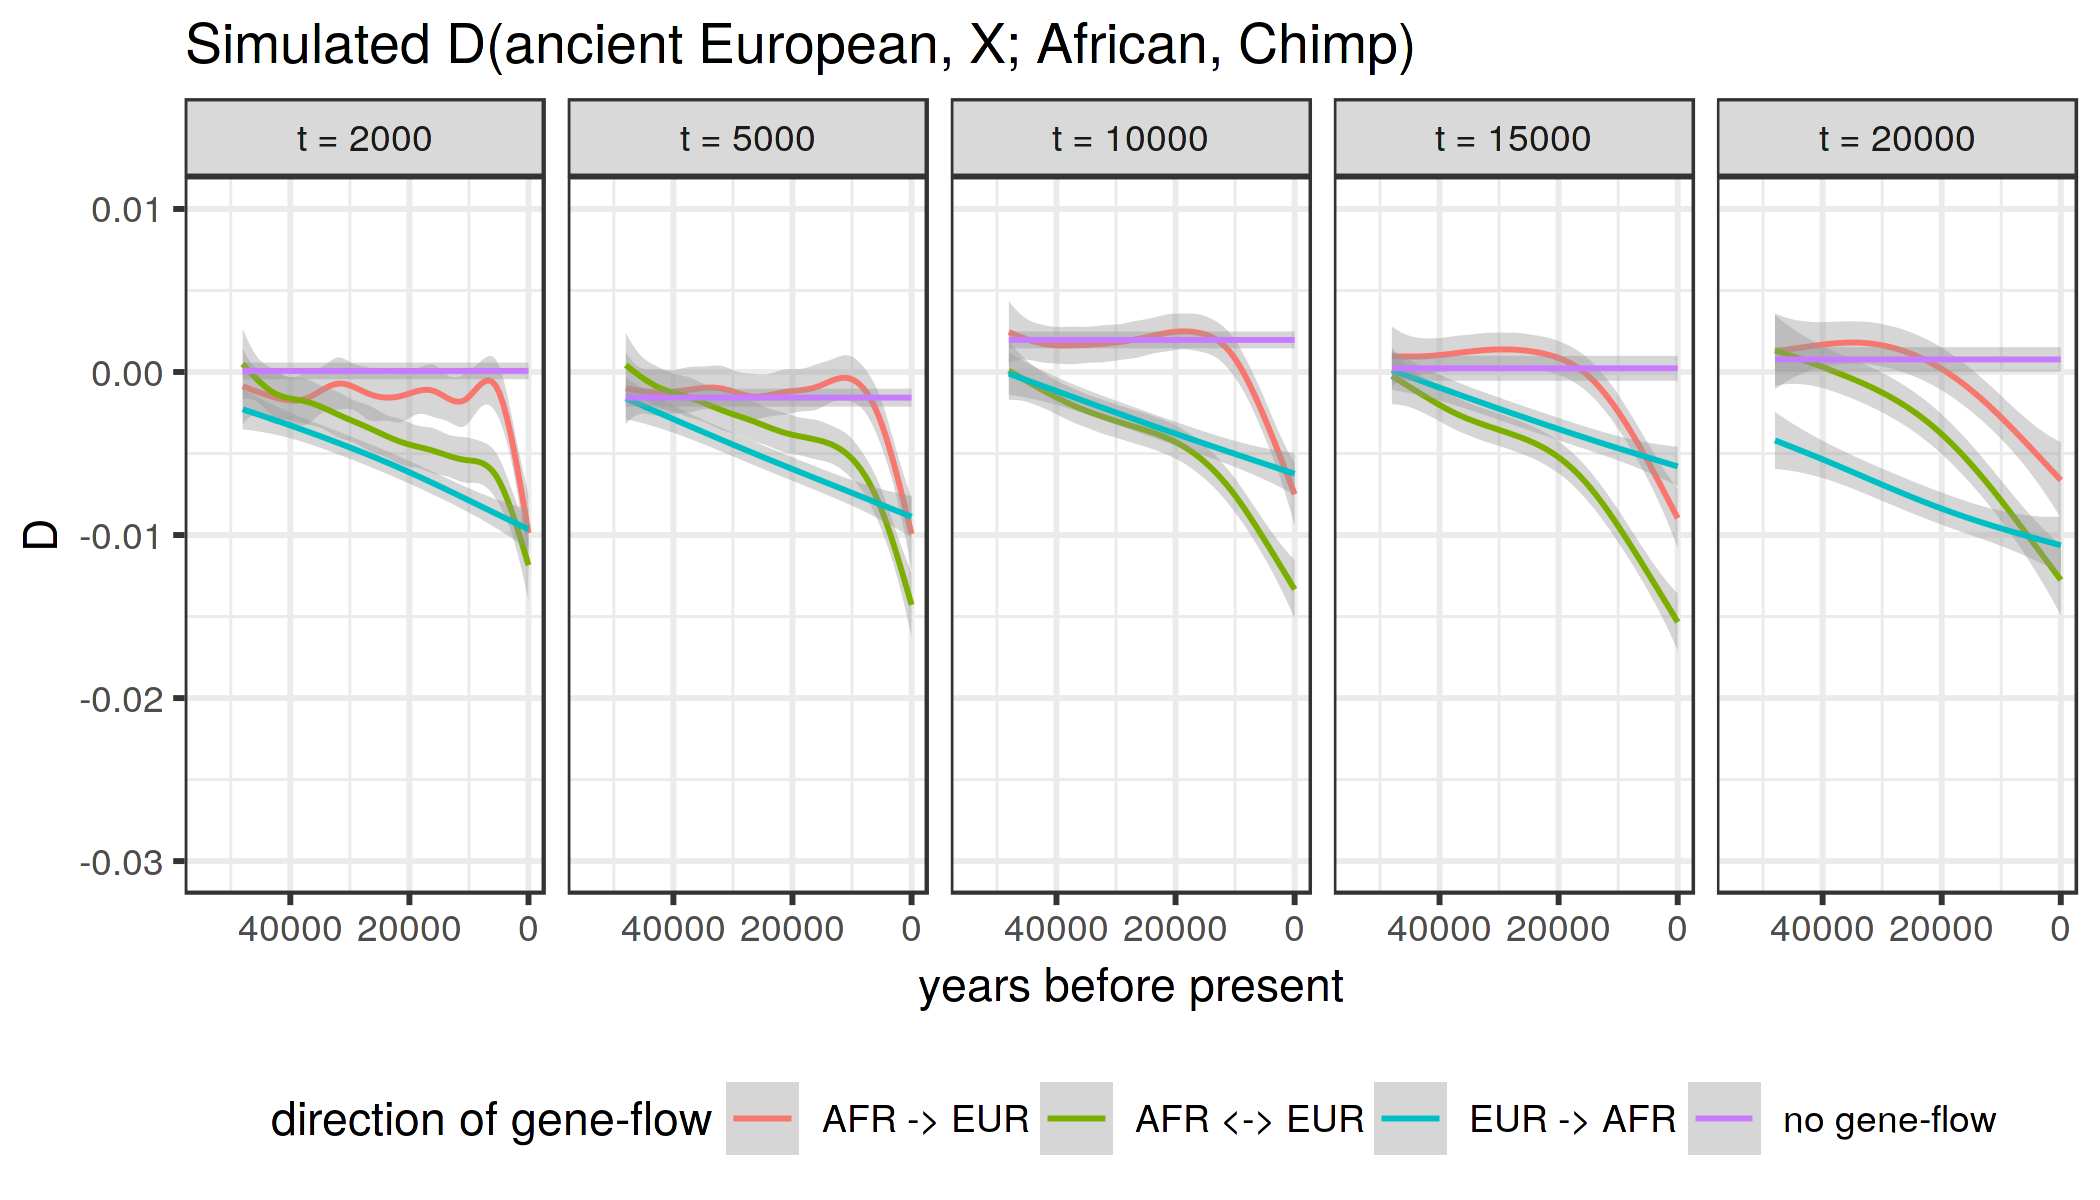

In [64]:
set_dim(7, 4, 300)

filter(df, stat == "d", asc == "all") %>%
mutate(t = paste0("t = ", t)) %>%
mutate(t = factor(t, levels = paste0("t = ", c(2000, 5000, 10000, 15000, 20000)))) %>%
mutate(direction = case_when(direction == "afr_to_eur" ~ "AFR -> EUR",
                             direction == "eur_to_afr" ~ "EUR -> AFR",
                             direction == "both_directions" ~ "AFR <-> EUR",
                             direction == "no_migration" ~ "no gene-flow")) %>% 
ggplot(aes(age, value, color = direction)) + geom_smooth(size = 0.5) +
    facet_grid(. ~ t) +
    xlim(55000, 0) +
    ggtitle("Simulated D(ancient European, X; African, Chimp)") +
    ylab("D") + xlab("years before present") +
    labs(color = "direction of gene-flow") +
    coord_cartesian(y = c(-0.03, 0.01)) +
    theme_bw() +
    theme(legend.position = "bottom")

ggsave(here("figures/simulated_d.png"), width = 7, height = 4, units = "in")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


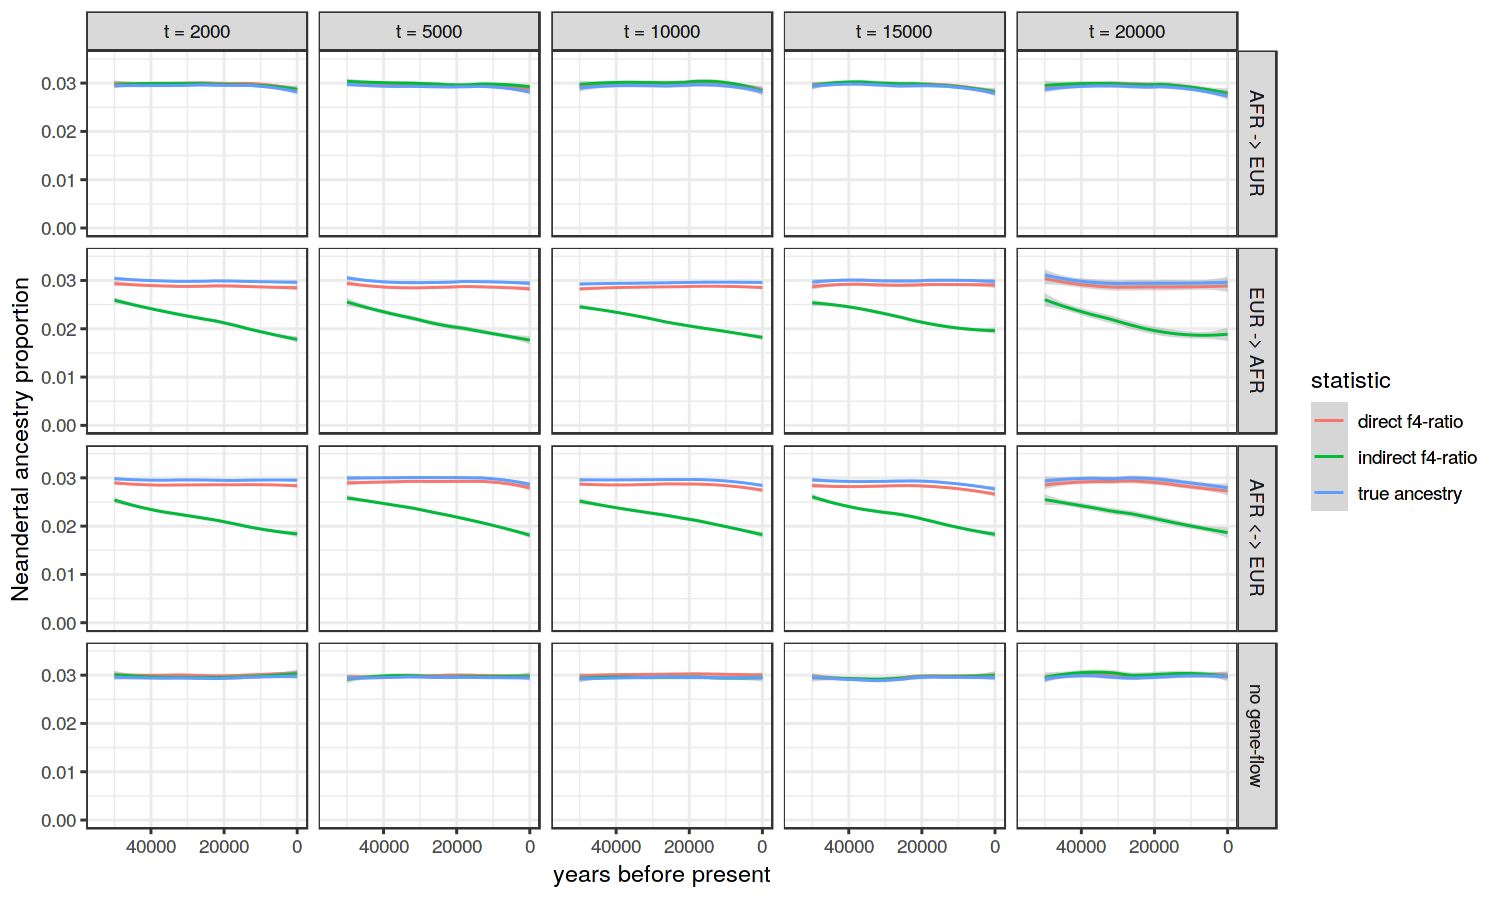

In [84]:
set_dim(10, 6)

df %>% filter(stat != "admix_prop") %>%
    group_by(name, age, asc, t, direction, stat) %>%
    summarise(value = mean(value, na.rm = TRUE)) %>%
ungroup %>% 
mutate(t = paste0("t = ", t)) %>%
mutate(t = factor(t, levels = paste0("t = ", c(2000, 5000, 10000, 15000, 20000)))) %>%
mutate(direction = case_when(direction == "afr_to_eur" ~ "AFR -> EUR",
                             direction == "eur_to_afr" ~ "EUR -> AFR",
                             direction == "both_directions" ~ "AFR <-> EUR",
                             direction == "no_migration" ~ "no gene-flow")) %>%
mutate(direction = fct_relevel(direction, "AFR -> EUR", "EUR -> AFR")) %>%
mutate(stat = case_when(stat == "admix_prop" ~ "admixture array",
                        stat == "direct_f4" ~ "direct f4-ratio",
                        stat == "indirect_f4" ~ "indirect f4-ratio",
                        stat == "true_prop" ~ "true ancestry")) %>% 
filter(stat != "d") %>%
ggplot(aes(age, value, color = stat)) + geom_smooth(size = 0.5) +
    ylab("Neandertal ancestry proportion") +
    xlab("years before present") +
    facet_grid(direction ~ t) + xlim(55000, 0) + ylim(0, 0.035) +
    labs(color = "statistic") + theme_bw()

ggsave(here("figures/simulated_N_ancestry.png"), width = 10, height = 6, units = "in")

# Fig. 4

In [87]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [96]:
dt.region_f4.layout[region.fac == 'protein_coding']

region.fac     y0 y1 N   pos pos0 h0  
1 protein_coding 0  1  197 4   3.7  0.15
2 protein_coding 0  1  197 4   4.5  0.15
3 protein_coding 0  1  197 4   5.3  0.15

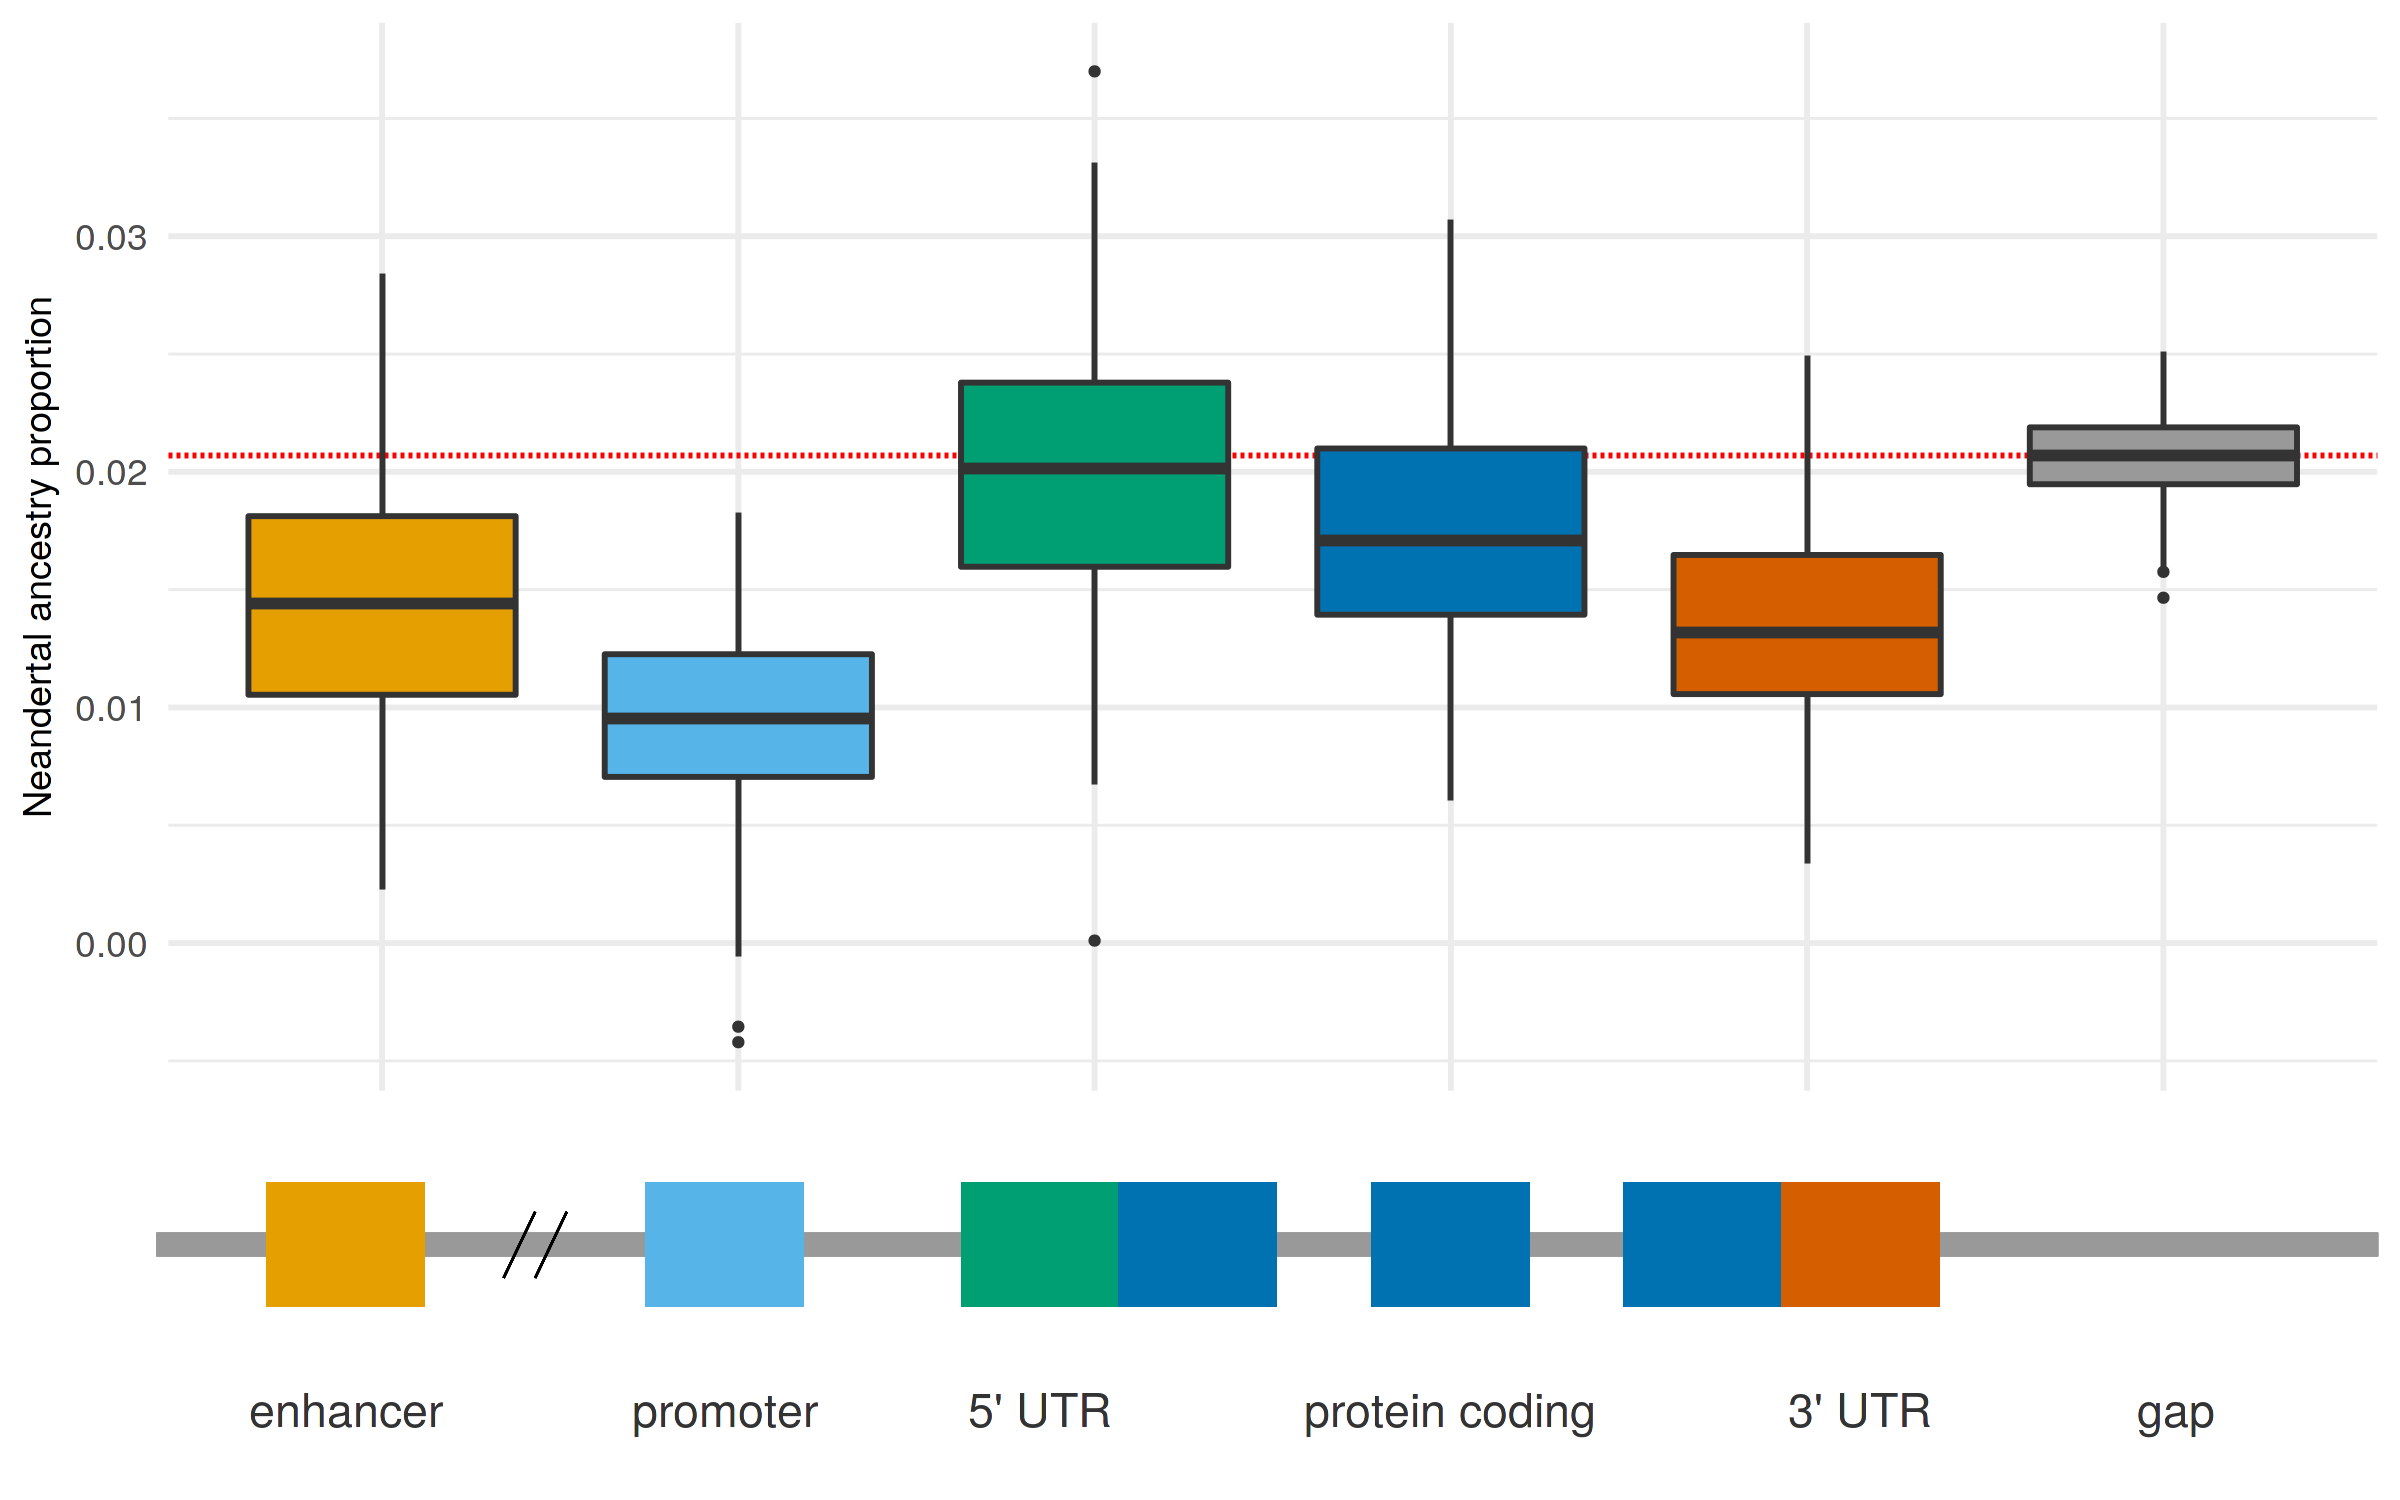

In [102]:
region_f4 <- readRDS(here("data/rds/nea_in_genomic_regions.rds")) %>%
    mutate(region = case_when(region == "protein_coding" ~ "protein coding",
                              region == "utr5" ~ "5' UTR",
                              region == "utr3" ~ "3' UTR",
                              TRUE ~ region))

dt.region_f4 <- data.table(region_f4)
#dt.region_f4[, .N, region]

my.regions <- c("enhancer", "promoter", "5' UTR", "protein coding", "3' UTR", "gap")

dt.region_f4.subset <- dt.region_f4[region %in% my.regions]
dt.region_f4.subset[, region.fac := factor(region, levels = my.regions)]

cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p1 <- ggplot(dt.region_f4.subset,
       aes(x=region.fac, y=alpha, fill=region.fac)) +
  geom_hline(yintercept = median(dt.region_f4[region == 'gap', alpha]),
             linetype = 2, color = "red") +
  geom_boxplot(outlier.size = .5) + 
  # geom_jitter(size = 0.1) +
  xlab('') +
  # xlab('Genomic Region') +
  ylab('Neandertal ancestry proportion') +
  theme_bw() +
  theme(legend.position="none",
        panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.title.x = element_blank(),
        panel.border = element_blank(),
        axis.title.y = element_text(size=9)) +
        # panel.grid.minor = element_line(size=.4, color='gray')) +
  # theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
  scale_fill_manual(values=cbPalette[c(2,3,4,6,7,1)]) +
  NULL

dt.region_f4.layout <- dt.region_f4.subset[, list(y0 = 0, y1 = 1, .N), keyby=region.fac]
dt.region_f4.layout[, pos := 1:.N]
dt.region_f4.layout <- rbind(dt.region_f4.layout,
                             # dt.region_f4.layout[region.fac != 'gap'],
                             dt.region_f4.layout[region.fac == 'protein coding'],
                             dt.region_f4.layout[region.fac == 'protein coding'])
setkey(dt.region_f4.layout, region.fac)
dt.region_f4.layout[, pos0 := c(1,2.2, 3.2,3.7, 4.5, 5.3,5.8, 6.8)]
# dt.region_f4.layout[region.fac == 'protein_coding', h0 := .20]
# dt.region_f4.layout[region.fac != 'protein_coding', h0 := .1]
dt.region_f4.layout[, h0 := .15]
dt.region_f4.layout[region.fac == 'gap', h0 := 0]
dt.region_f4.layout[region.fac %like% 'utr', h0 := .13]

p2 <- ggplot(dt.region_f4.layout, 
             aes(x=pos0, y=y0, fill=region.fac)) + 
  geom_segment(x=.4, y=0, xend=8, yend=0, size=2, color=cbPalette[1]) +
  geom_segment(x=1.5, y=-.04, xend=1.6, yend=.04, size=.2) +
  geom_segment(x=1.6, y=-.04, xend=1.7, yend=.04, size=.2) +
  # geom_hline(yintercept = 0, size=2, color=cbPalette[1]) +
  geom_tile(aes(height=h0), width=.5) +
  theme(legend.position="none",
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank()) +
  ylim(-.25, .1) +
  xlim(0.35, 7.1) +
  geom_text(data=dt.region_f4.layout[, list(pos0 = median(pos0),
                                            y0 = -.2), region.fac],
            aes(label = region.fac), alpha=.8) +
  scale_fill_manual(values=cbPalette[c(2,3,4,6,7,1)]) +
  NULL

set_dim(8, 5, 300)
multiplot(p1, p2, layout = matrix(c(1,1,1,2), ncol = 1))

# Neandertal trajectories - supplementary plots

In [75]:
set_dim(7, 4, 300)

p1 <- list.files(here("data/simulations"), pattern = "^traj_Ne*", full.names = TRUE) %>%
map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = str_replace(basename(.x), "traj_", "") %>% str_replace("_exon.*", "") %>% str_replace("Ne_", "Nea Ne = "))) %>%
mutate(model = fct_relevel(model, "Nea Ne = " %+% c(100, 500, 1000, 10000))) %>% 
group_by(model, gen) %>% 
summarise(mean_rep=mean(mean), sd_rep=sd(mean), n_rep=n()) %>%
mutate(se_rep=sd_rep / sqrt(n_rep),
     lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
     upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep) %>% 
ggplot(aes(gen, mean_rep)) +
    geom_line(aes(color = model), linetype = 2) +
    geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill = model), alpha=1/2) +
    ylab("average Neandertal ancestry") + xlab("generation after admixture") +
    theme_bw() + coord_cartesian(y = c(0, 0.1))

p2 <- p1 + scale_x_log10() + xlab("generation after admixture (log scale)")

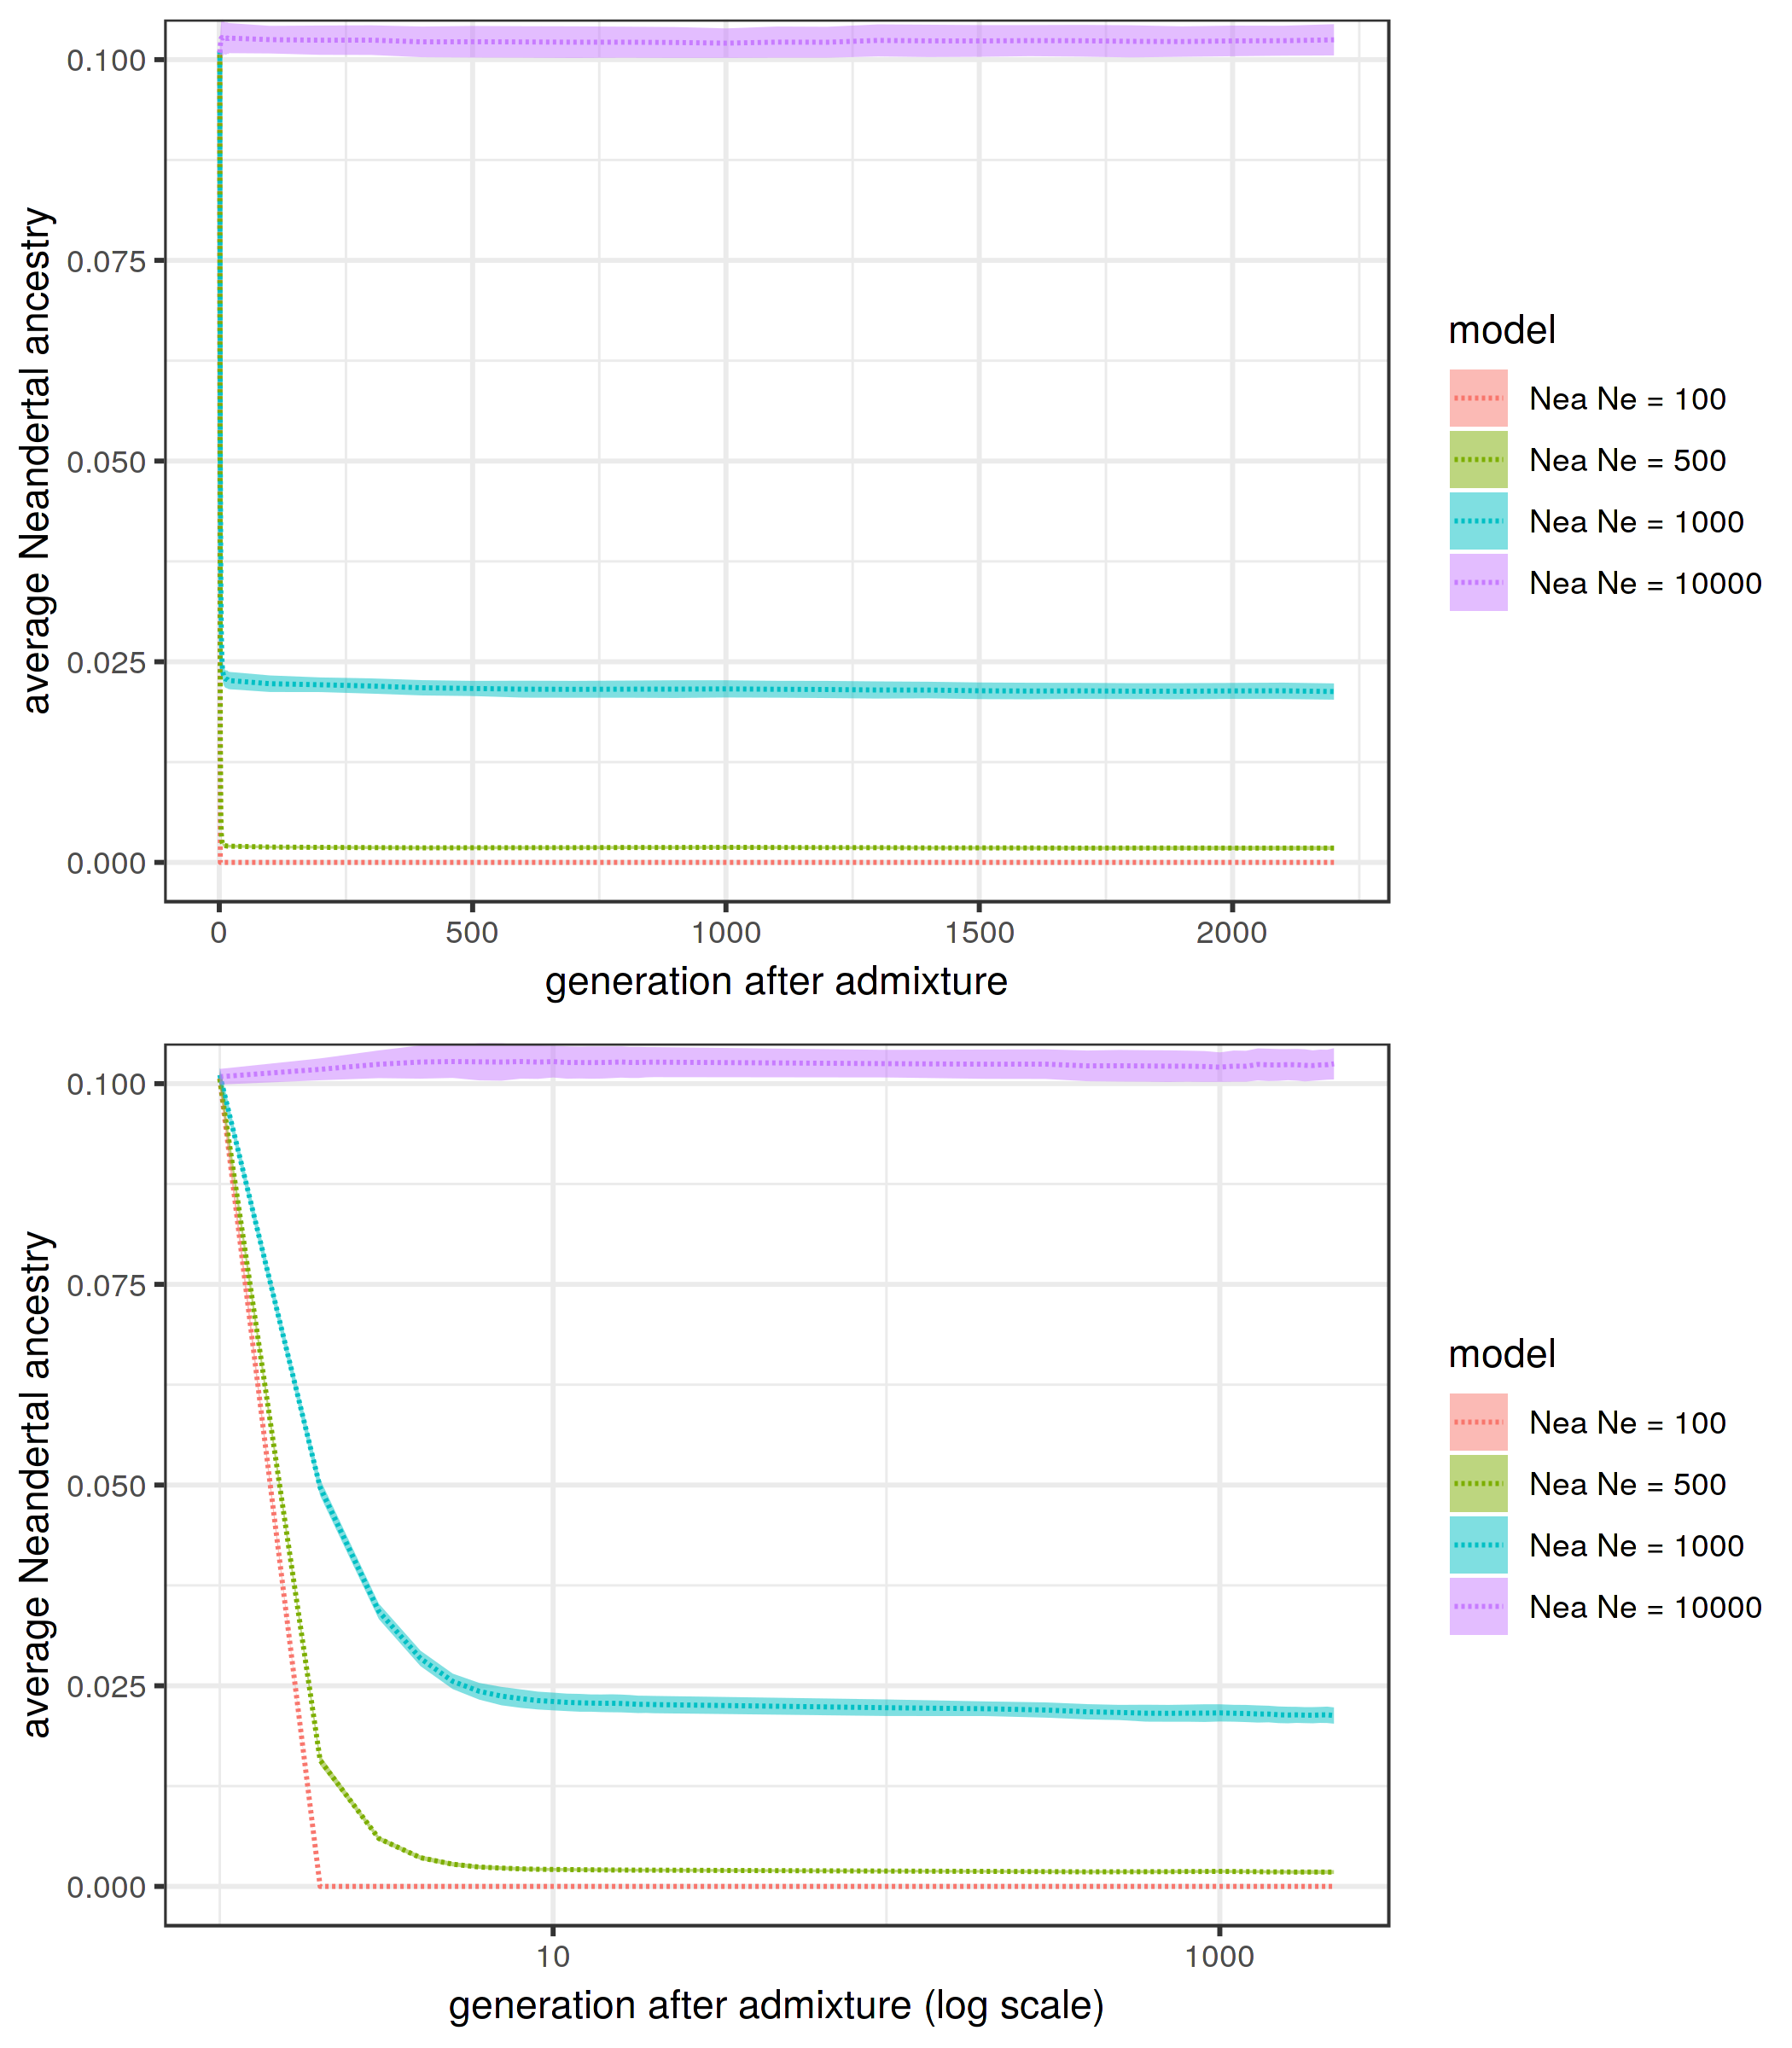

In [76]:
set_dim(7, 8, 300)

p1 / p2

ggsave(here("figures/figS3_Neandertal_Ne.png"), width = 7, height = 8, units = "in")

In [78]:
set_dim(7, 4, 300)

p1 <- bind_rows(
list.files(here("data/simulations"), pattern = "^traj_constant*", full.names = TRUE) %>% map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = "constant")),
list.files(here("data/simulations"), pattern = "^traj_linear*", full.names = TRUE) %>% map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = "linear")),
list.files(here("data/simulations"), pattern = "^traj_gravel*", full.names = TRUE) %>% map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = "gravel"))
) %>%
group_by(model, gen) %>% 
summarise(mean_rep=mean(mean), sd_rep=sd(mean), n_rep=n()) %>%
mutate(se_rep=sd_rep / sqrt(n_rep),
     lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
     upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep) %>% 
ggplot(aes(gen, mean_rep)) +
    geom_line(aes(color = model), linetype = 2) +
    geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill = model), alpha=1/5) +
    ylab("average Neandertal ancestry") + xlab("generation after admixture") +
    theme_bw() + coord_cartesian(y = c(0, 0.1))

p2 <- p1 + scale_x_log10() + xlab("generation after admixture (log scale)")

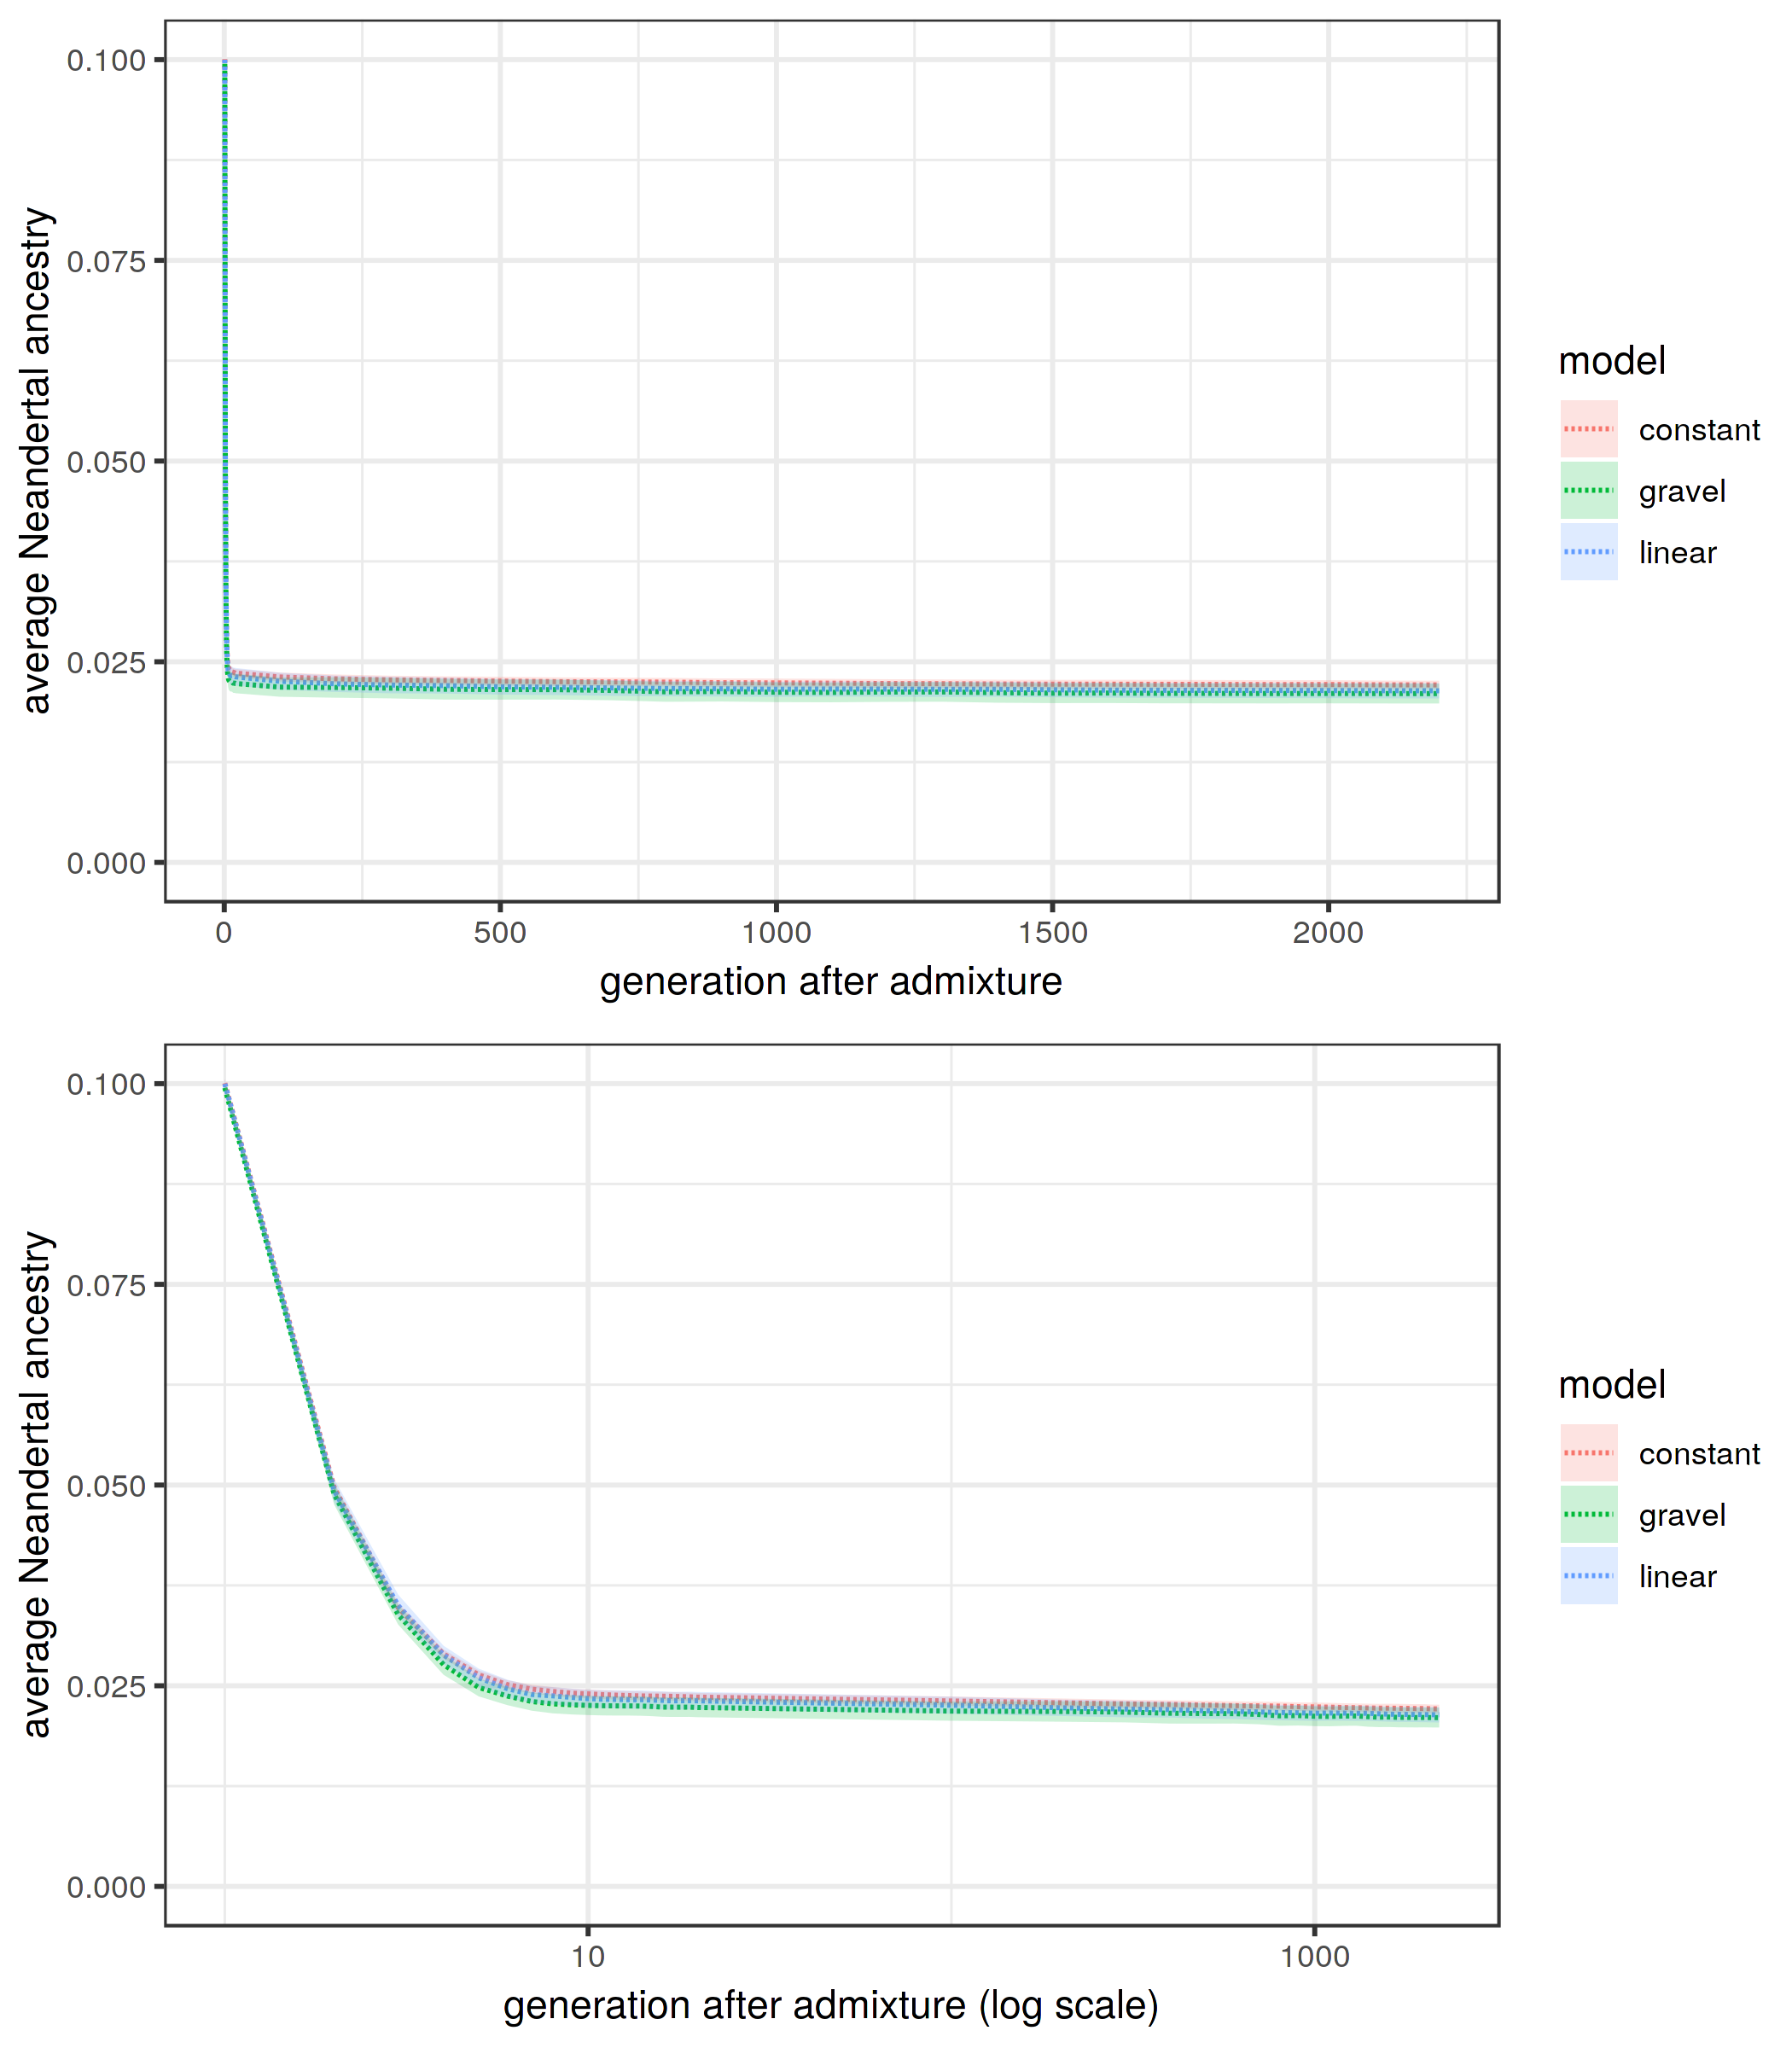

In [79]:
set_dim(7, 8, 300)

p1 / p2

ggsave(here("figures/figS4_human_Ne.png"), width = 7, height = 8, units = "in")

In [82]:
set_dim(7, 4, 300)

p1 <- list.files(here("data/simulations"), pattern = "^traj_mult*", full.names = TRUE) %>%
map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = str_replace(basename(.x), "data/simulations/traj_", "") %>%
                                      str_replace("_rep_.*", "") %>% str_replace("traj_mult_", "s x "))) %>%
group_by(model, gen) %>% 
summarise(mean_rep=mean(mean), sd_rep=sd(mean), n_rep=n()) %>%
mutate(se_rep=sd_rep / sqrt(n_rep),
     lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
     upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep) %>%
ungroup %>%
mutate(model = factor(model, labels = "s x " %+% c("1.0", 1.1, 1.25, 1.5, 1.75, "2.0", "5.0", "10.0"))) %>%
ggplot(aes(gen, mean_rep)) +
    geom_line(aes(color = model), linetype = 2) +
    geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill = model), alpha=1/2) +
    ylab("average Neandertal ancestry") + xlab("generation after admixture") +
    theme_bw() + coord_cartesian(y = c(0, 0.1))

p2 <- p1 + scale_x_log10() + xlab("generation after admixture (log scale)")

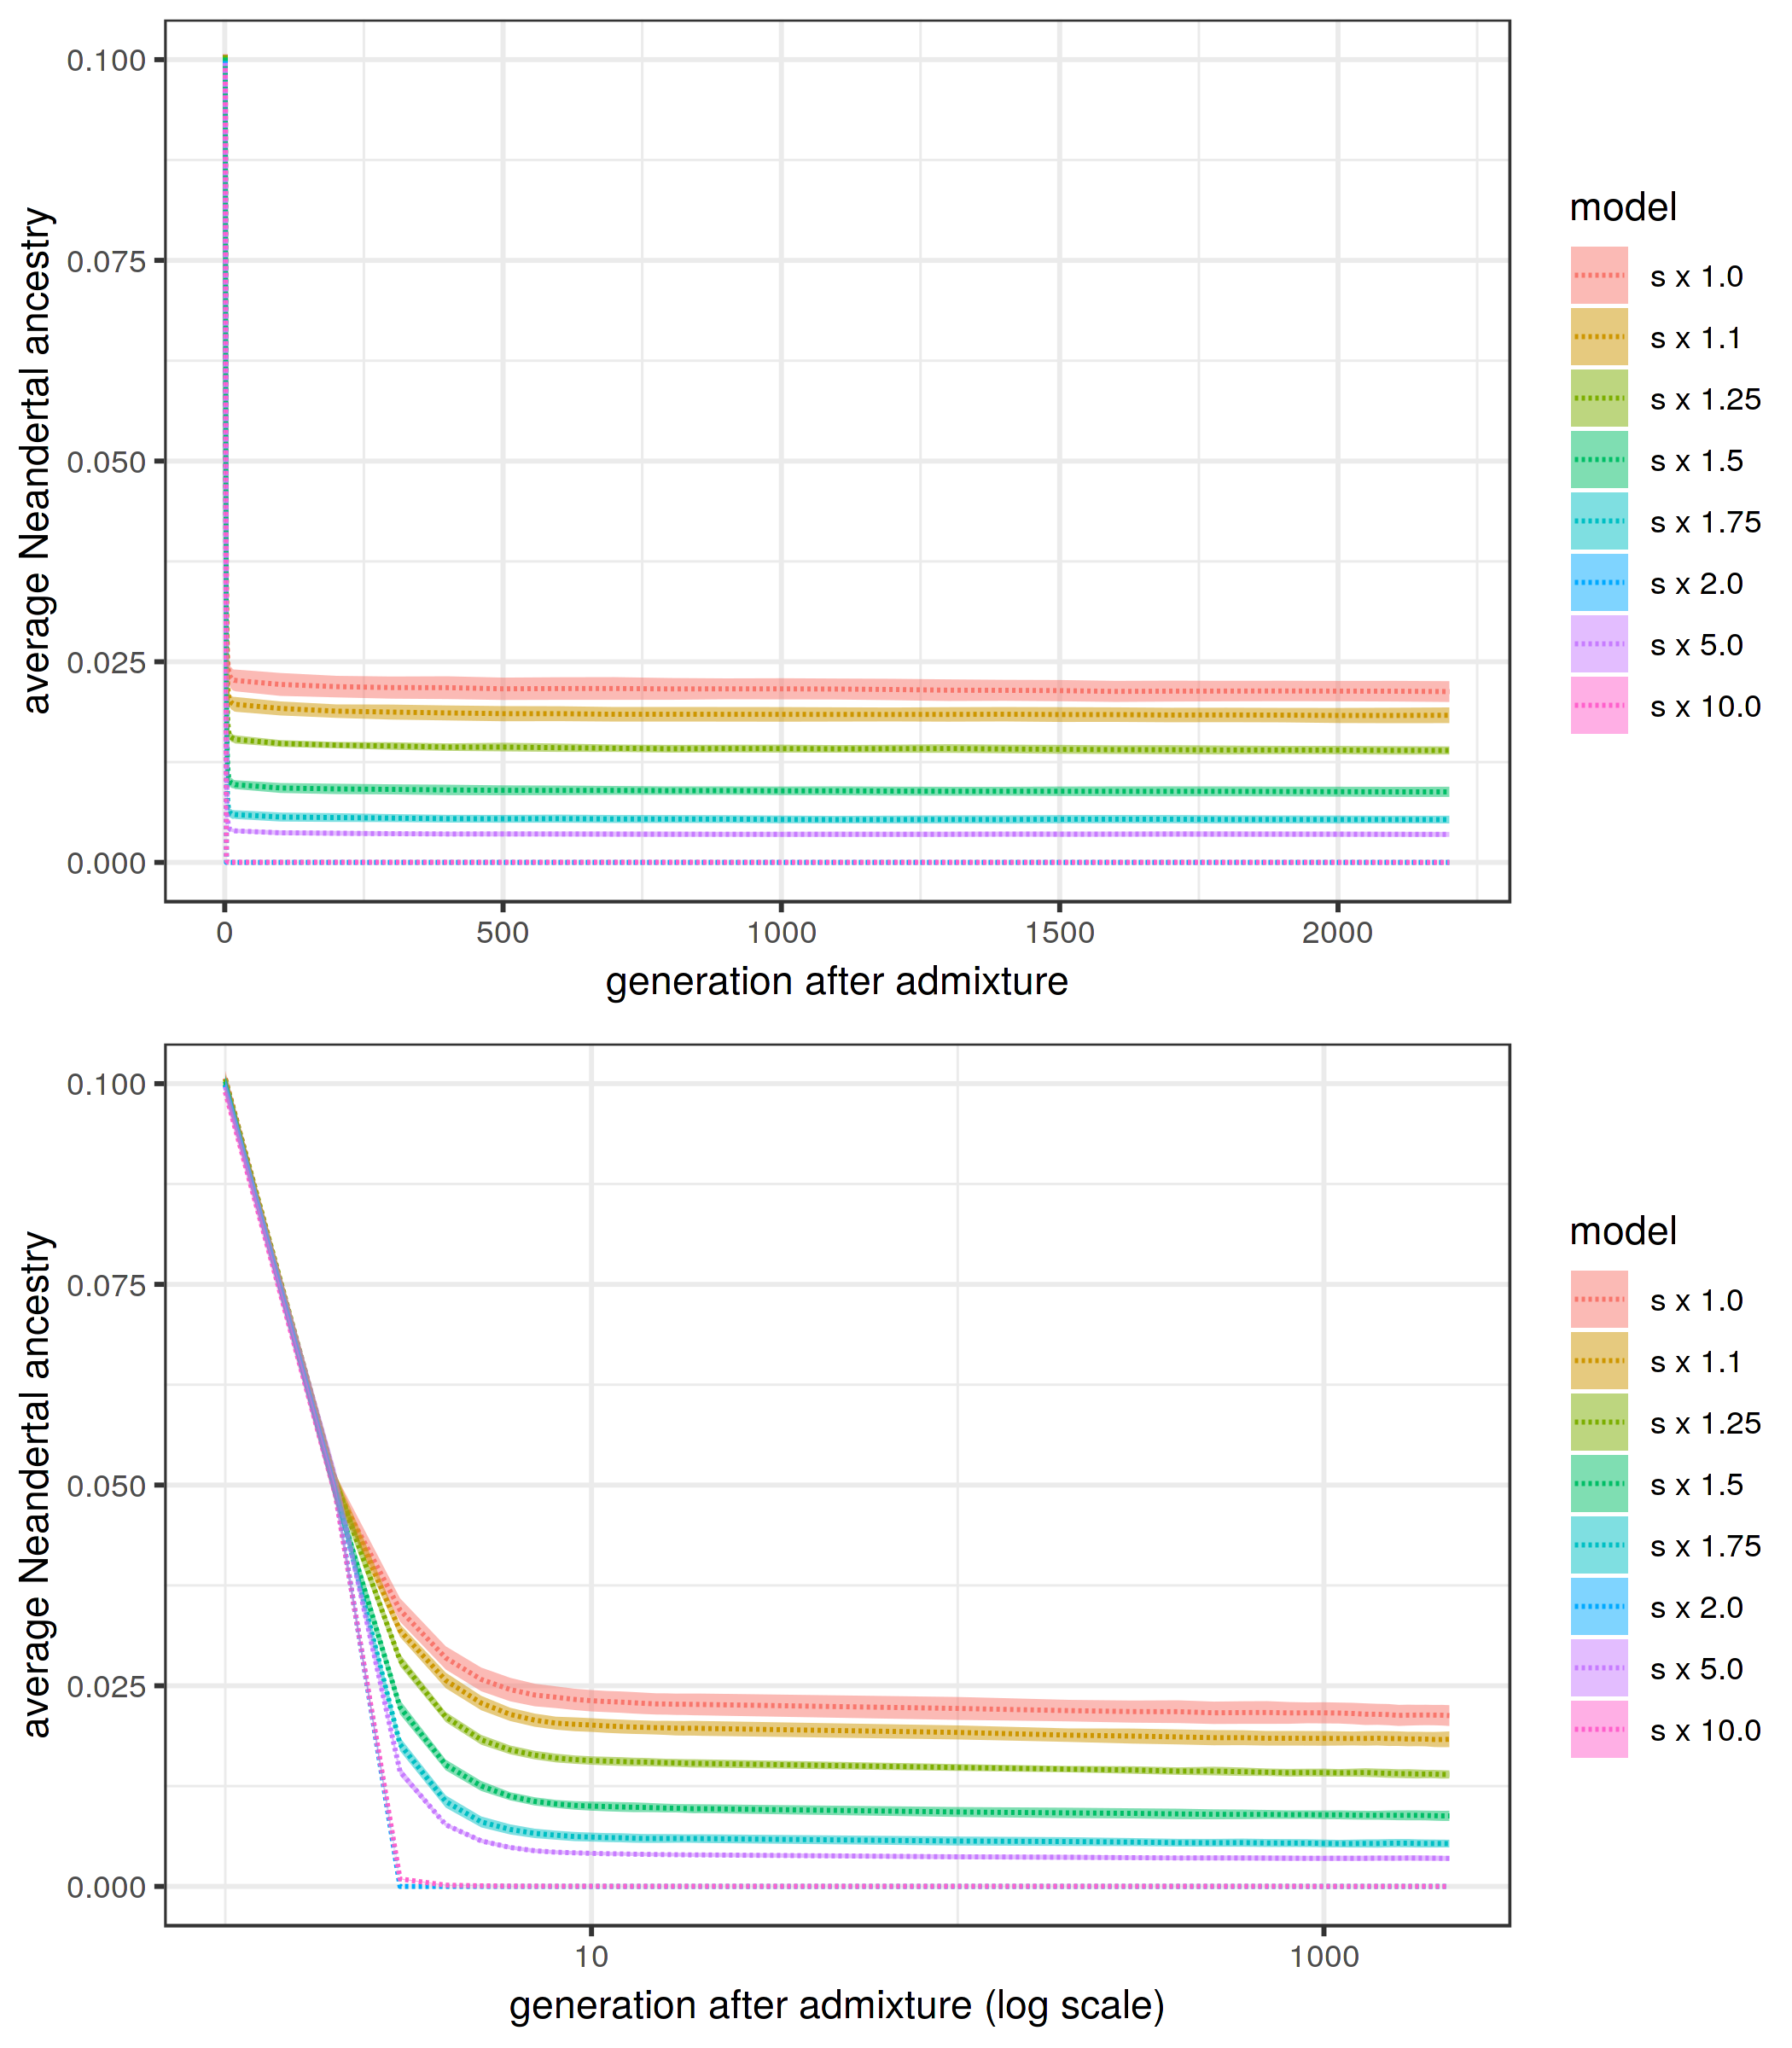

In [83]:
set_dim(7, 8, 300)

p1 / p2

ggsave(here("figures/figS5_bumping_up_DFE.png"), width = 7, height = 8, units = "in")

In [85]:
set_dim(7, 4, 300)

p1 <- lapply(c("exon", "protein_coding", "tf_binding_site", "utr3", "promoter"), function(region) {
    list.files(here("data/simulations"), pattern = "^traj_" %+% region %+% "*", full.names = TRUE) %>%
        map_dfr(~ suppressMessages(read_tsv(.x)) %>% mutate(model = str_replace(basename(.x), "traj_", "") %>%
                                              str_replace("_rep_.*", "")))
    }) %>%
bind_rows %>%
group_by(model, gen) %>% 
summarise(mean_rep=mean(mean), sd_rep=sd(mean), n_rep=n()) %>%
mutate(se_rep=sd_rep / sqrt(n_rep),
     lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
     upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep) %>%
ungroup %>% 
mutate(model = case_when(model == "exon" ~ "exon (74 Mb)",
                         model == "promoter" ~ "promoter (23 MB)",
                         model == "protein_coding" ~ "protein coding (34 Mb)",
                         model == "tf_binding_site" ~ "TF binding site (10 Mb)",
                         model == "utr3" ~ "3' UTR (37 Mb)")) %>%
mutate(model = fct_relevel(model, c("exon (74 Mb)", "3' UTR (37 Mb)", "protein coding (34 Mb)",
                             "promoter (23 MB)", "TF binding site (10 Mb)"))) %>% 
ggplot(aes(gen, mean_rep)) +
    geom_line(aes(color = model), linetype = 2) +
    geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill = model), alpha=1/2) +
    ylab("average Neandertal ancestry") + xlab("generation after admixture") +
    theme_bw() + coord_cartesian(y = c(0, 0.1))

p2 <- p1 + scale_x_log10() + xlab("generation after admixture (log scale)")

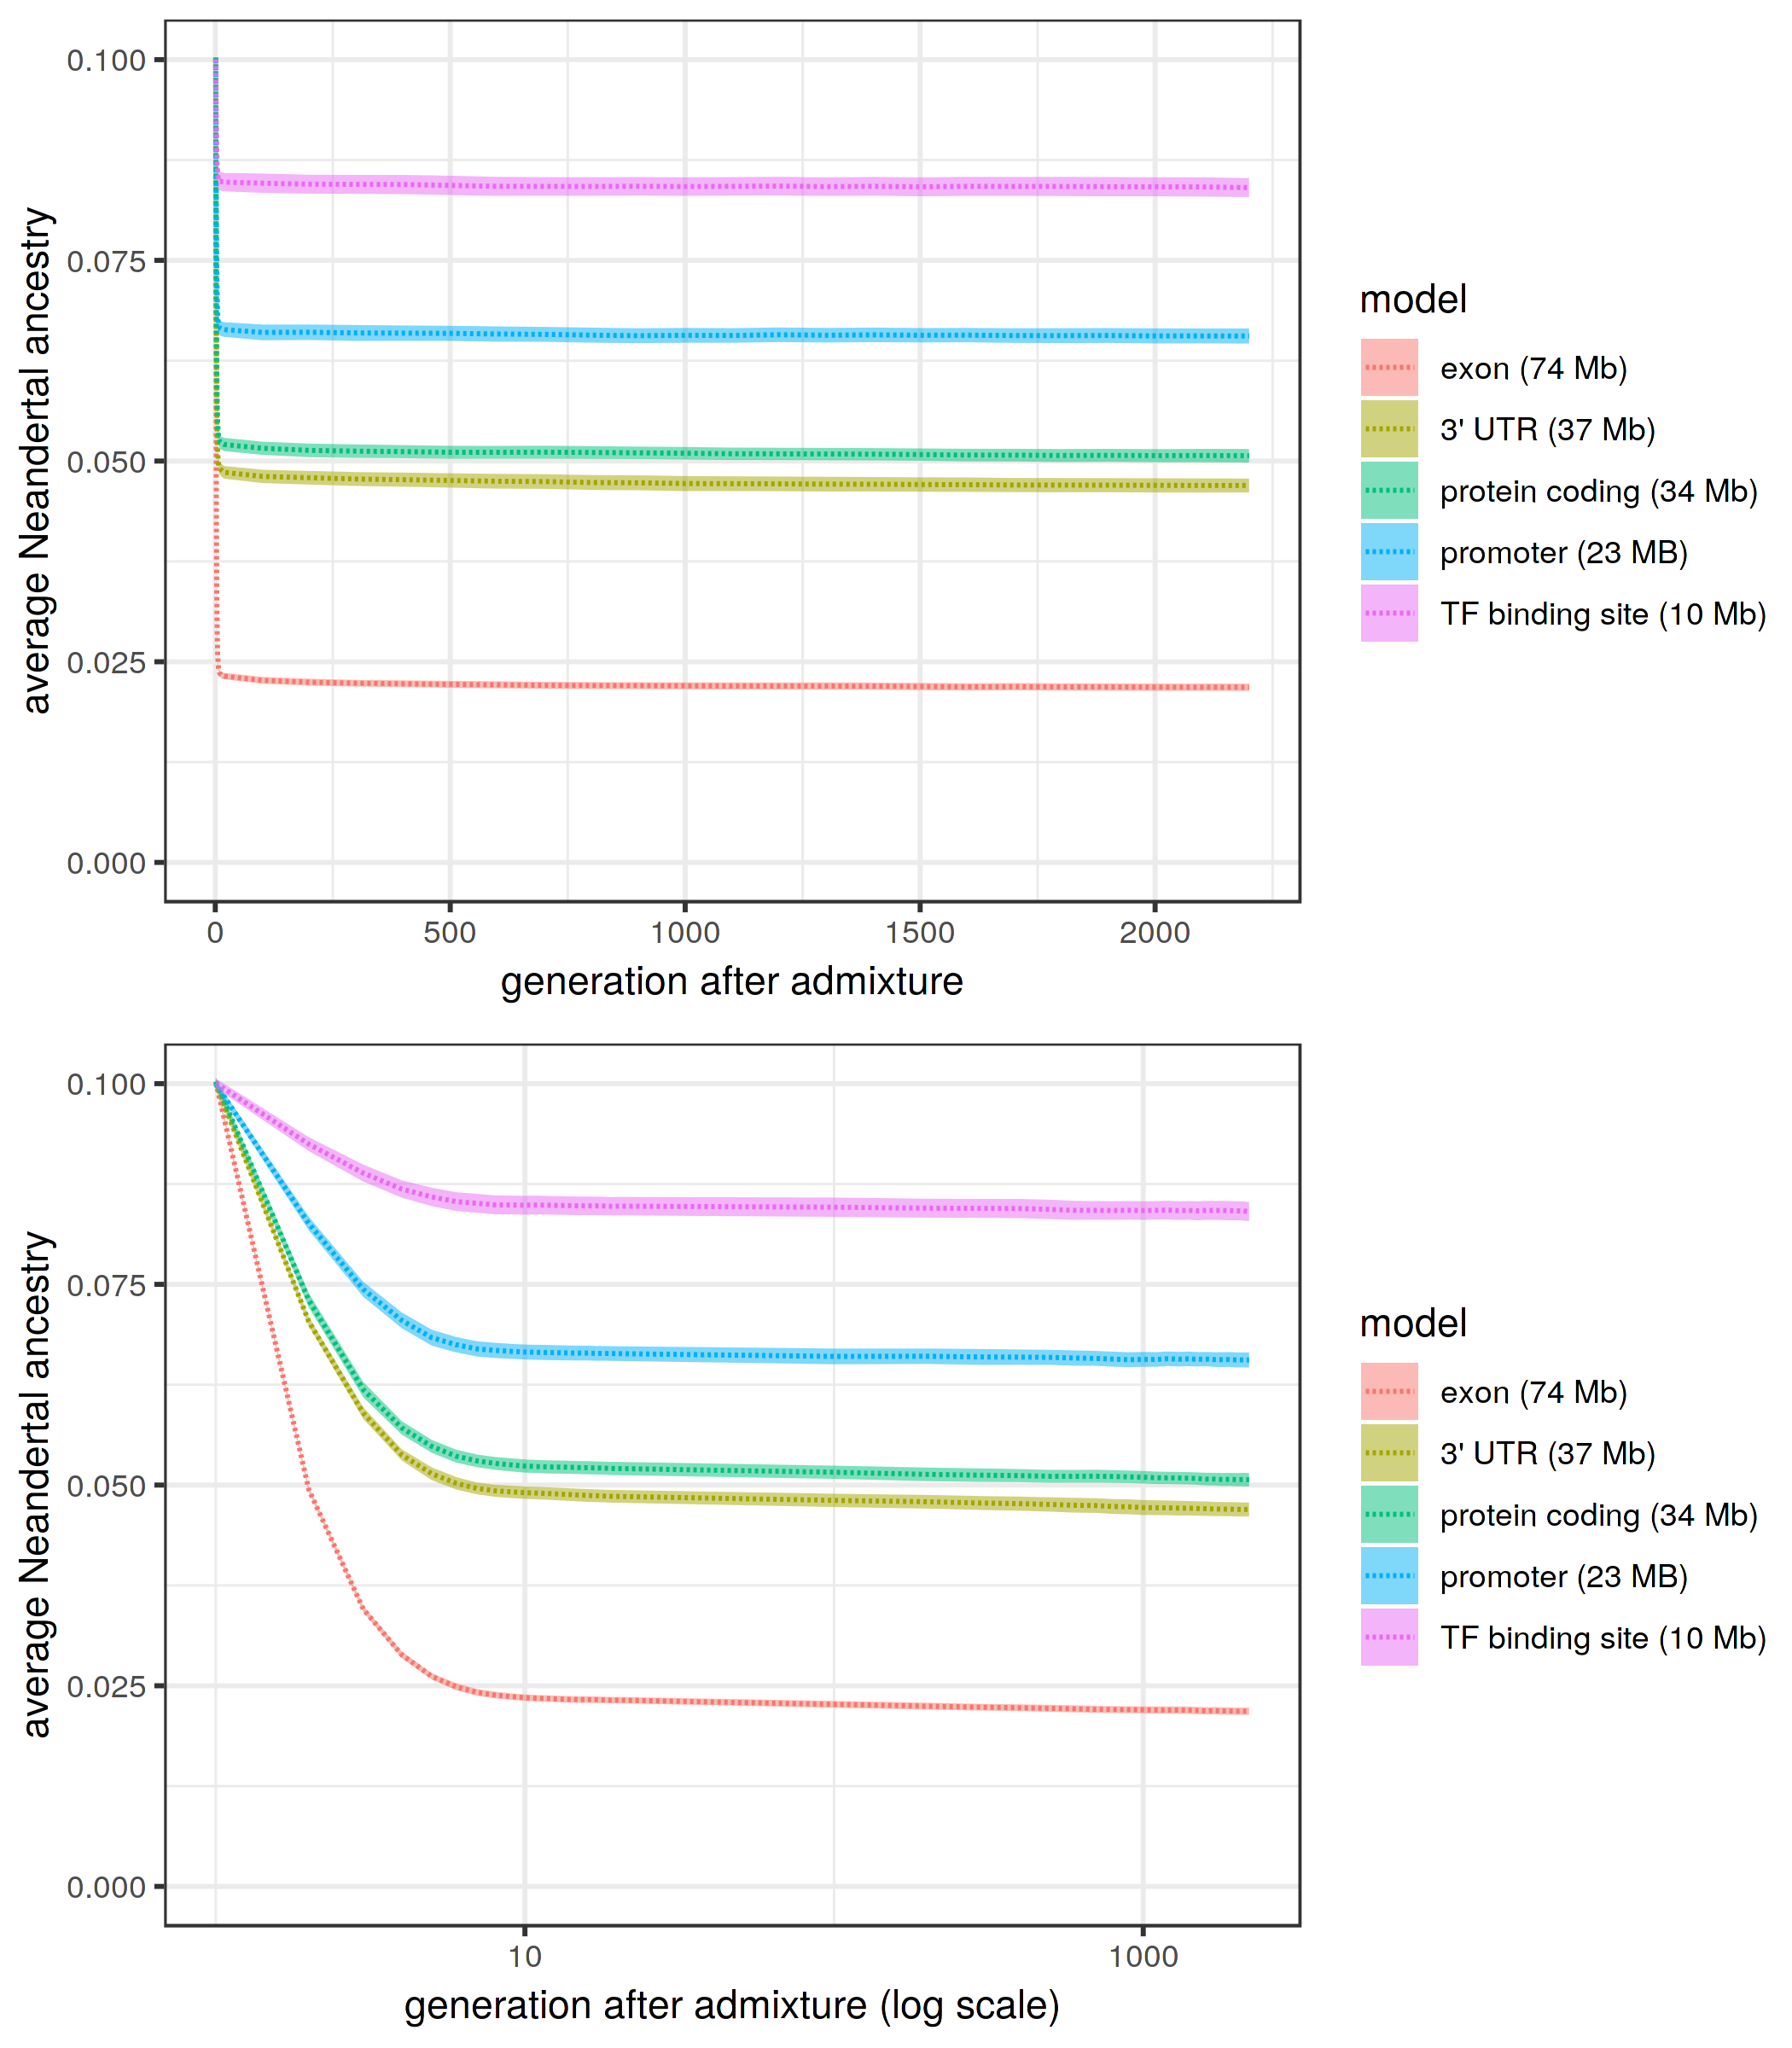

In [86]:
set_dim(7, 8, 300)

p1 / p2

ggsave(here("figures/figS6_amounts_of_del_sequence.png"), width = 7, height = 8, units = "in")

## Mixtures of dominance coefficients

In [67]:
set_dim(7, 4, 300)

# for translating fractions into %s
pct_tbl <- (seq(0, 100, 10) %+% "%") %>% setNames(c(seq(0, 1, 0.1)))

p1 <- list.files(here("data/simulations"), pattern = "^traj_mix*", full.names = TRUE) %>%
map_dfr(~ sm(read_tsv(.x)) %>%
        mutate(model = str_replace(basename(.x), "traj_mix_", "") %>%
                       str_replace("_rep_.*.txt", "") %>%
                       str_replace("add_", "") %>%
                       str_replace("0.0", "0") %>%
                       str_replace("1.0", "1")) %>%
        separate(model, sep = "_rec_", into = c("add", "rec")) %>%
        mutate(add = pct_tbl[add], rec = pct_tbl[rec]) %>% 
        mutate(model = add %+% " add., " %+% rec %+% " rec.")) %>% 
group_by(model, gen) %>% 
summarise(mean_rep=mean(mean), sd_rep=sd(mean), n_rep=n()) %>%
mutate(se_rep=sd_rep / sqrt(n_rep),
     lower_ci=mean_rep - qt(1 - (0.05 / 2), n_rep - 1) * se_rep,
     upper_ci=mean_rep + qt(1 - (0.05 / 2), n_rep - 1) * se_rep) %>%
ungroup %>% 
mutate(model = fct_reorder(model, mean_rep, .desc = TRUE)) %>% 
ggplot(aes(gen, mean_rep)) +
    geom_line(aes(color = model), linetype = 2) +
    geom_ribbon(aes(ymin=lower_ci, ymax=upper_ci, fill = model), alpha=1/2) +
    ylab("average Neandertal ancestry") + xlab("generation after admixture") +
    theme_bw() + coord_cartesian(y = c(0, 0.1))

p2 <- p1 + scale_x_log10() + xlab("generation after admixture (log scale)")

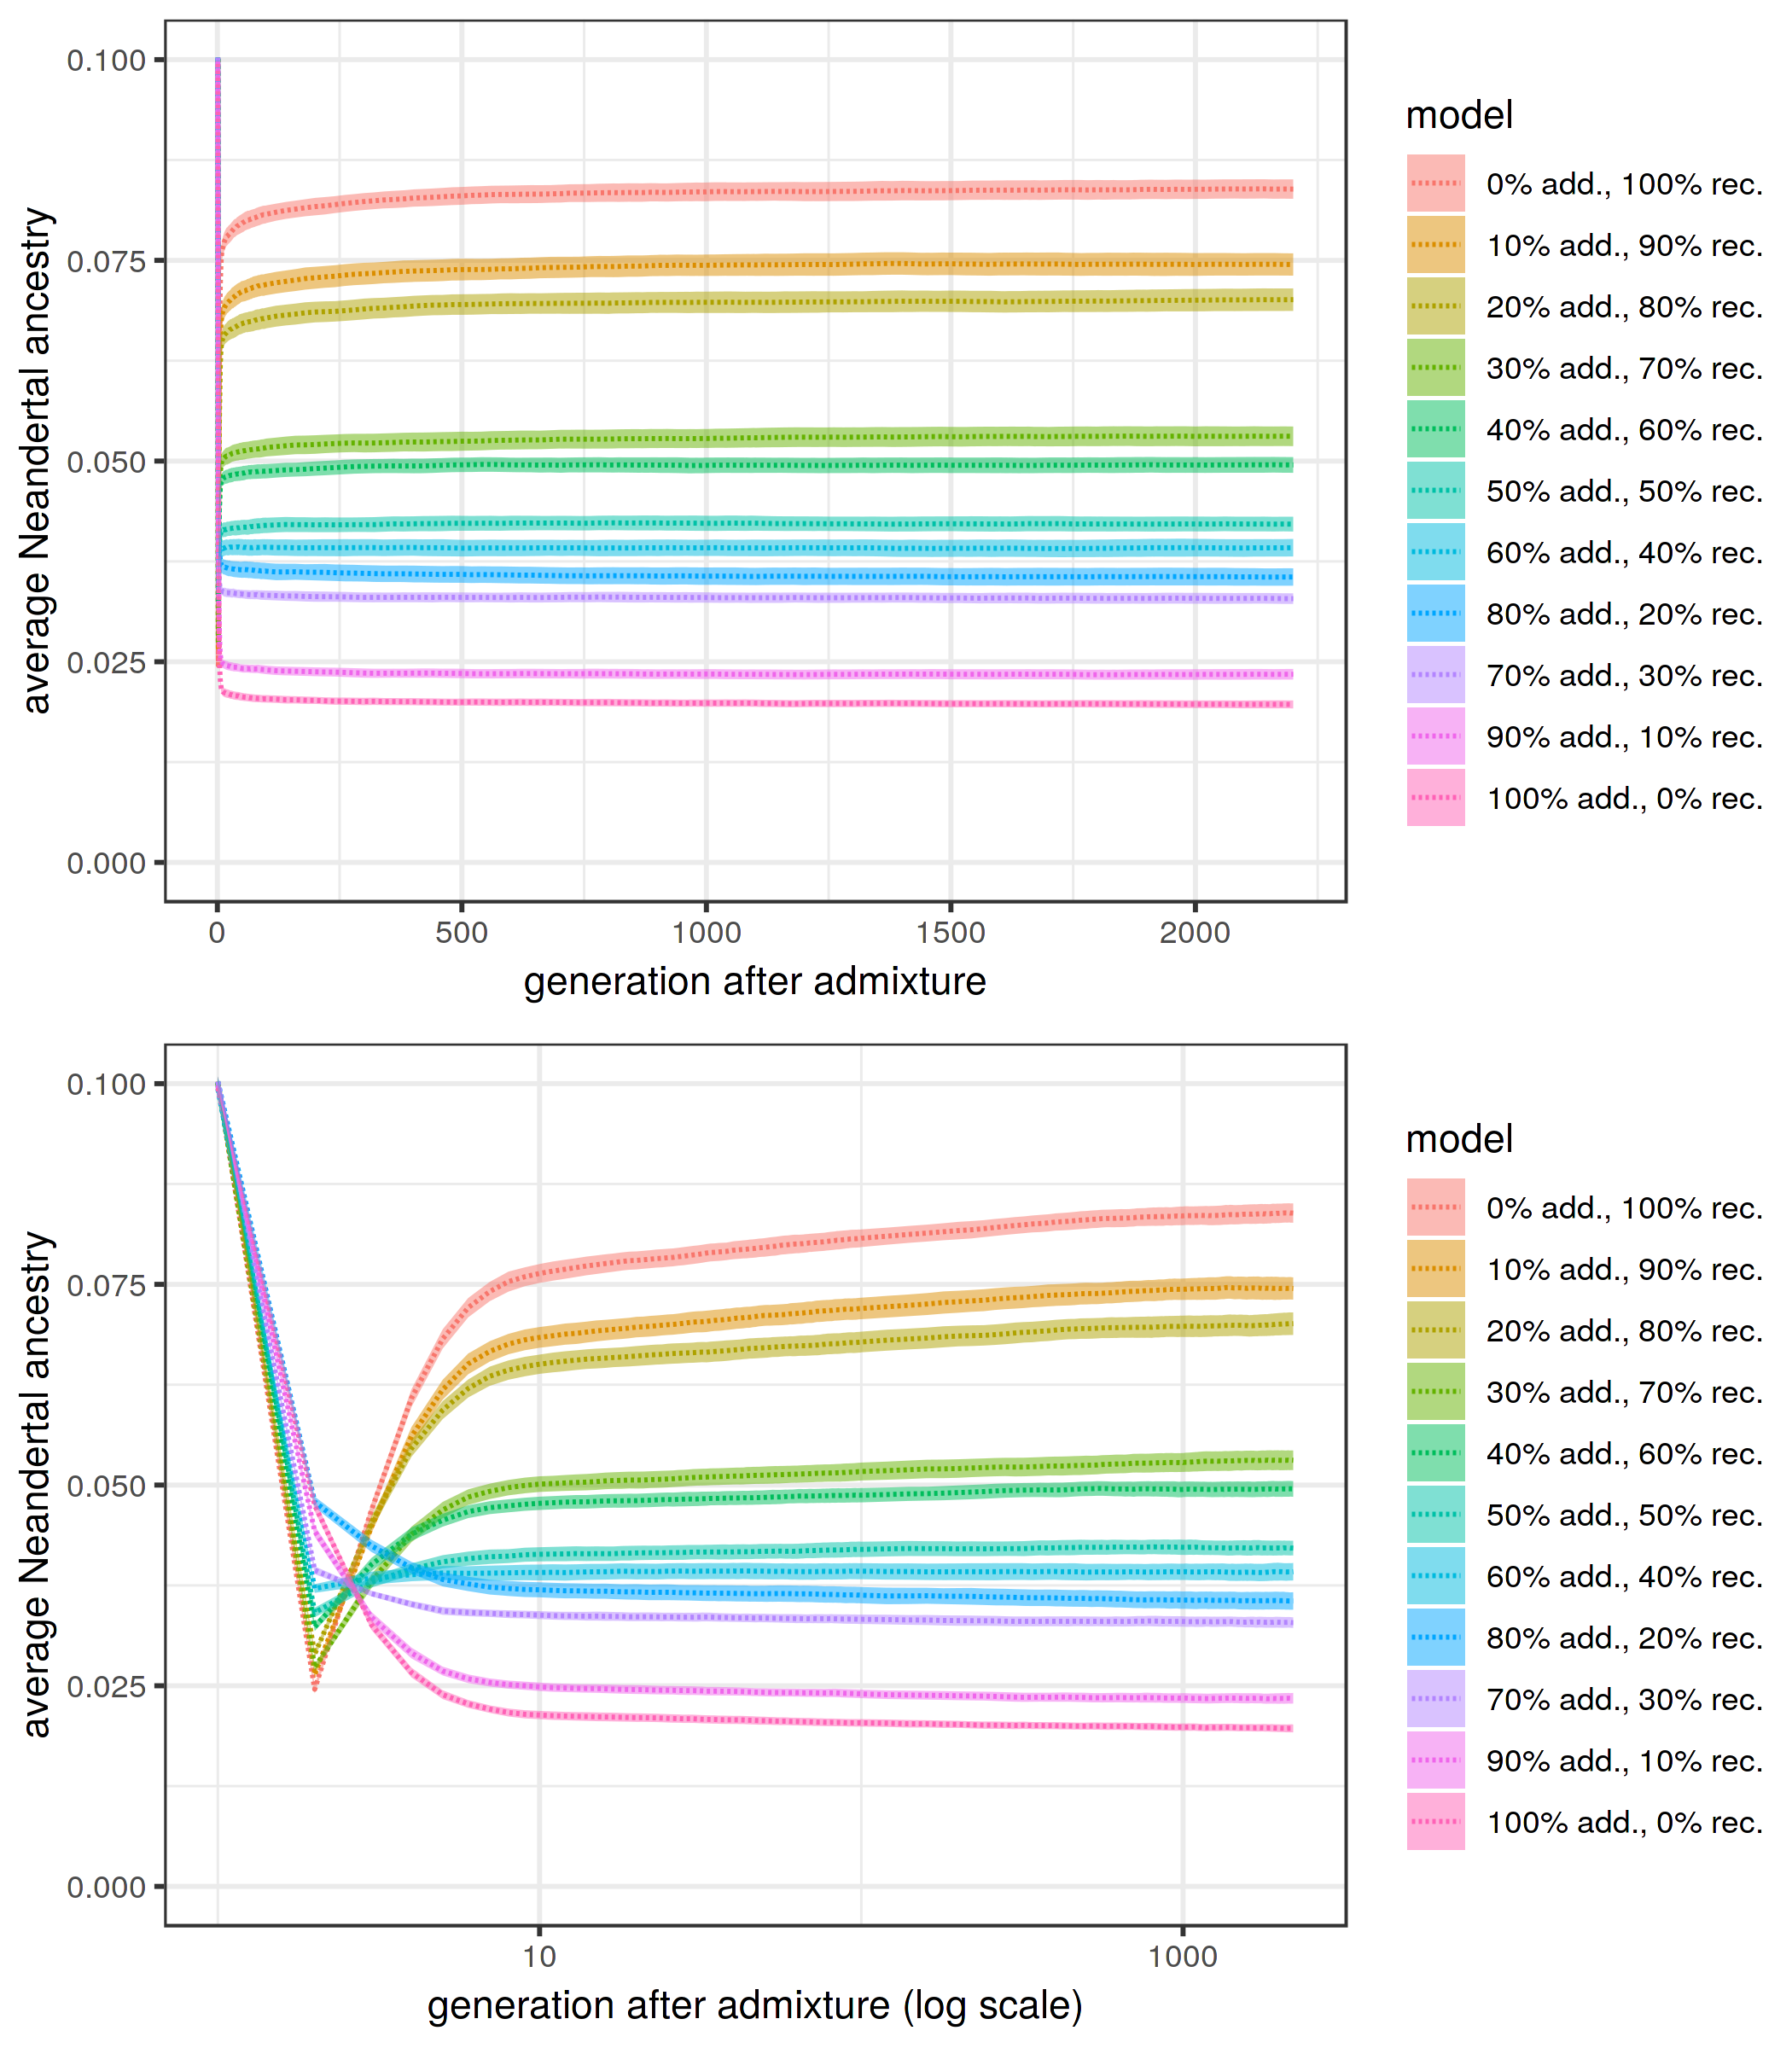

In [68]:
set_dim(7, 8, 300)

p1 / p2

ggsave(here("figures/figS7_dominance_mix.png"), width = 7, height = 8, units = "in")

## Effective population size models

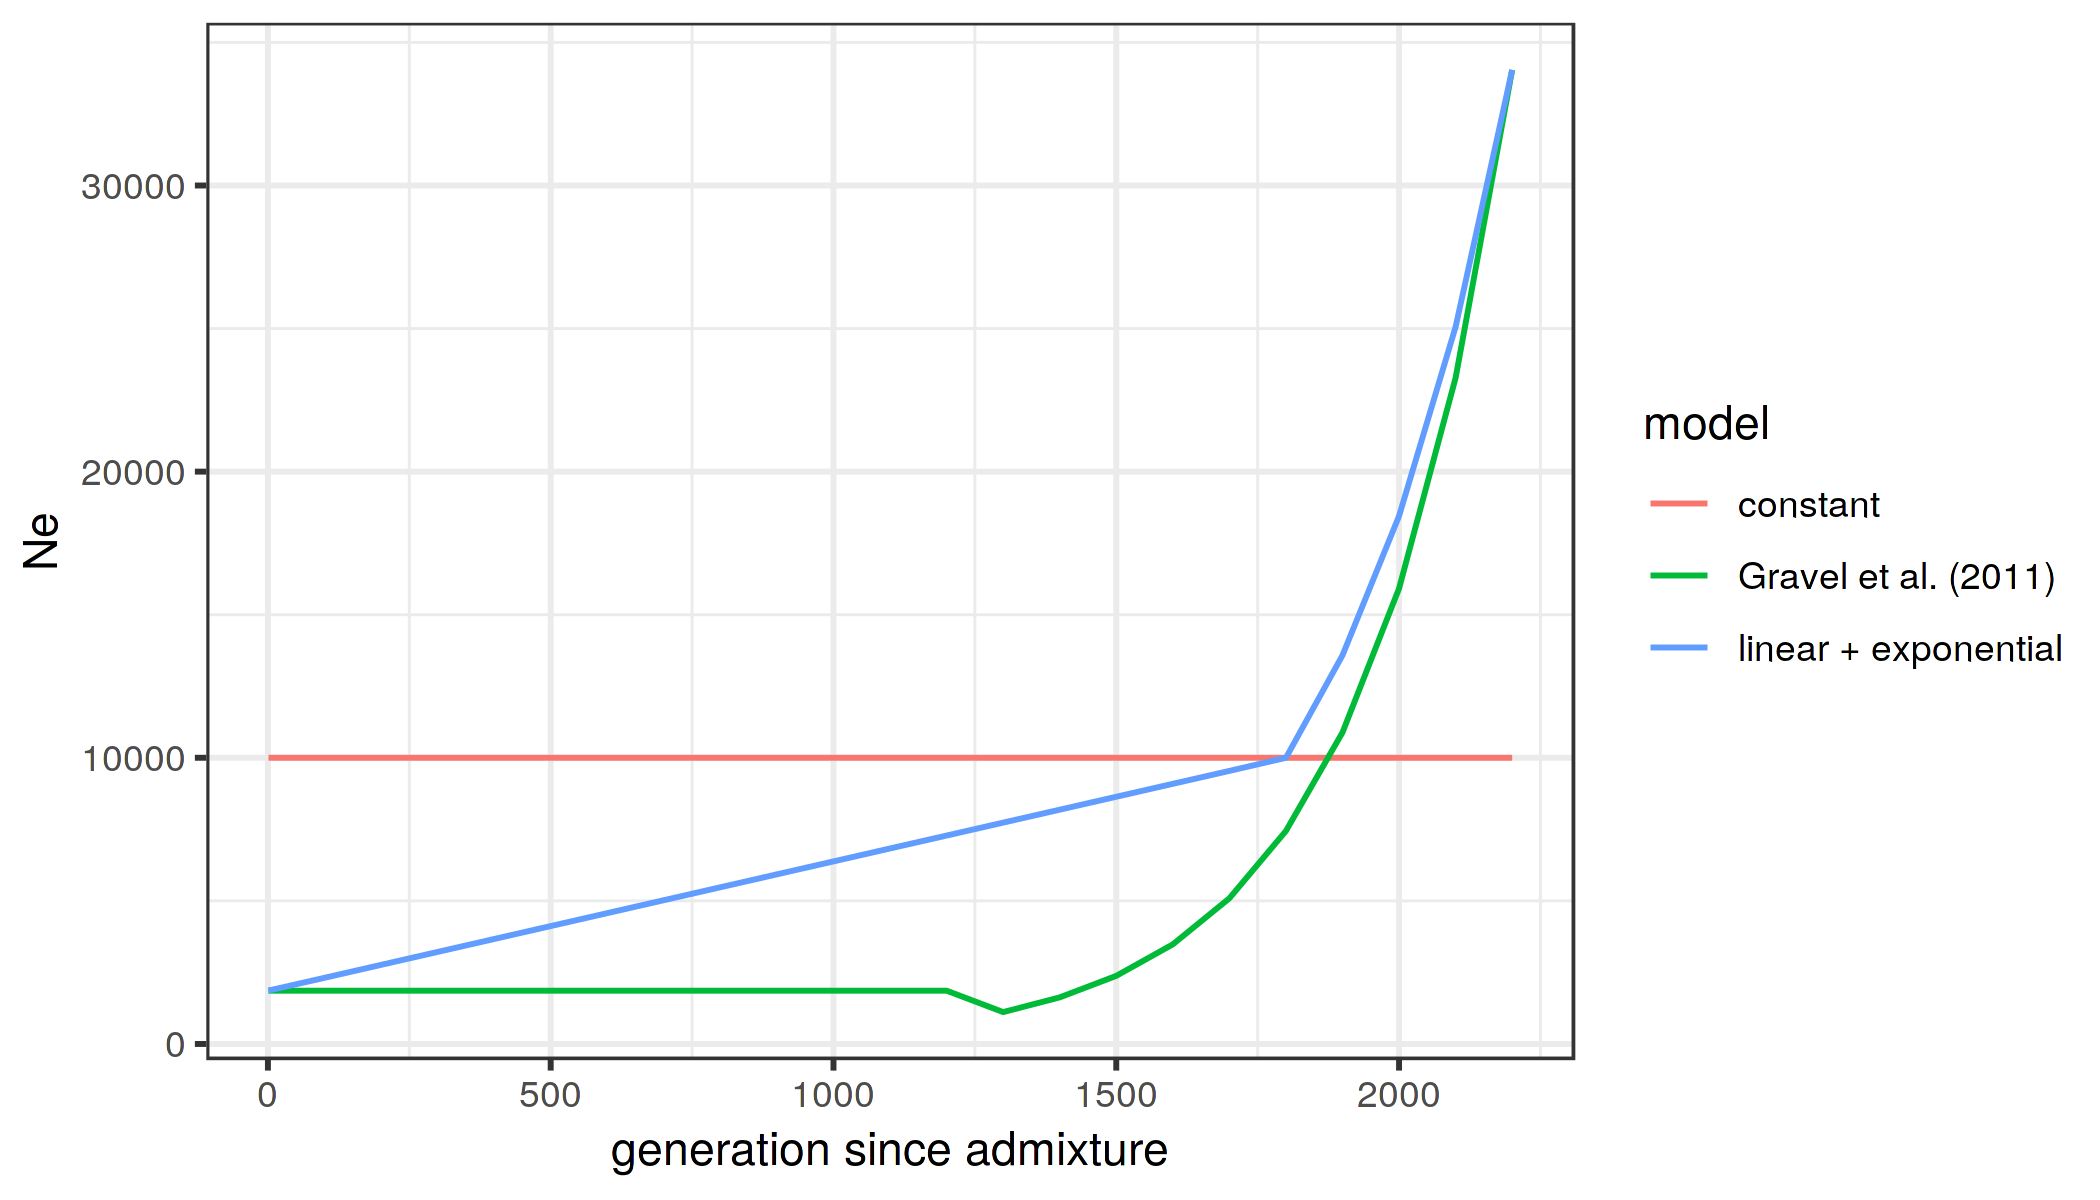

In [69]:
set_dim(7, 4, 300)

bind_rows(
    sm(read_tsv(here("data/simulations", "traj_constant_exon_rep_1_trajectory.txt"))) %>% mutate(model = "constant"),
    sm(read_tsv(here("data/simulations", "traj_linear_exon_rep_1_trajectory.txt"))) %>% mutate(model = "linear + exponential"),
    sm(read_tsv(here("data/simulations", "traj_gravel_exon_rep_1_trajectory.txt"))) %>% mutate(model = "Gravel et al. (2011)")
)  %>%
ggplot(aes(gen, Ne, color = model)) + geom_line() + xlab("generation since admixture") + theme_bw()

ggsave(here("figures/figS8_nonafrican_demographic_models.png"), width = 8, height = 5, units = "in")

## Ascertainment in real data

In [58]:
nea <- readRDS(here("data/rds/nea_ascertainment.rds"))

In [71]:
sample_names <- filter(nea, stat == "direct_f4", sites == "all", pop %in% c("EMH", "WestEurasia"), snp_count > 200000)$X

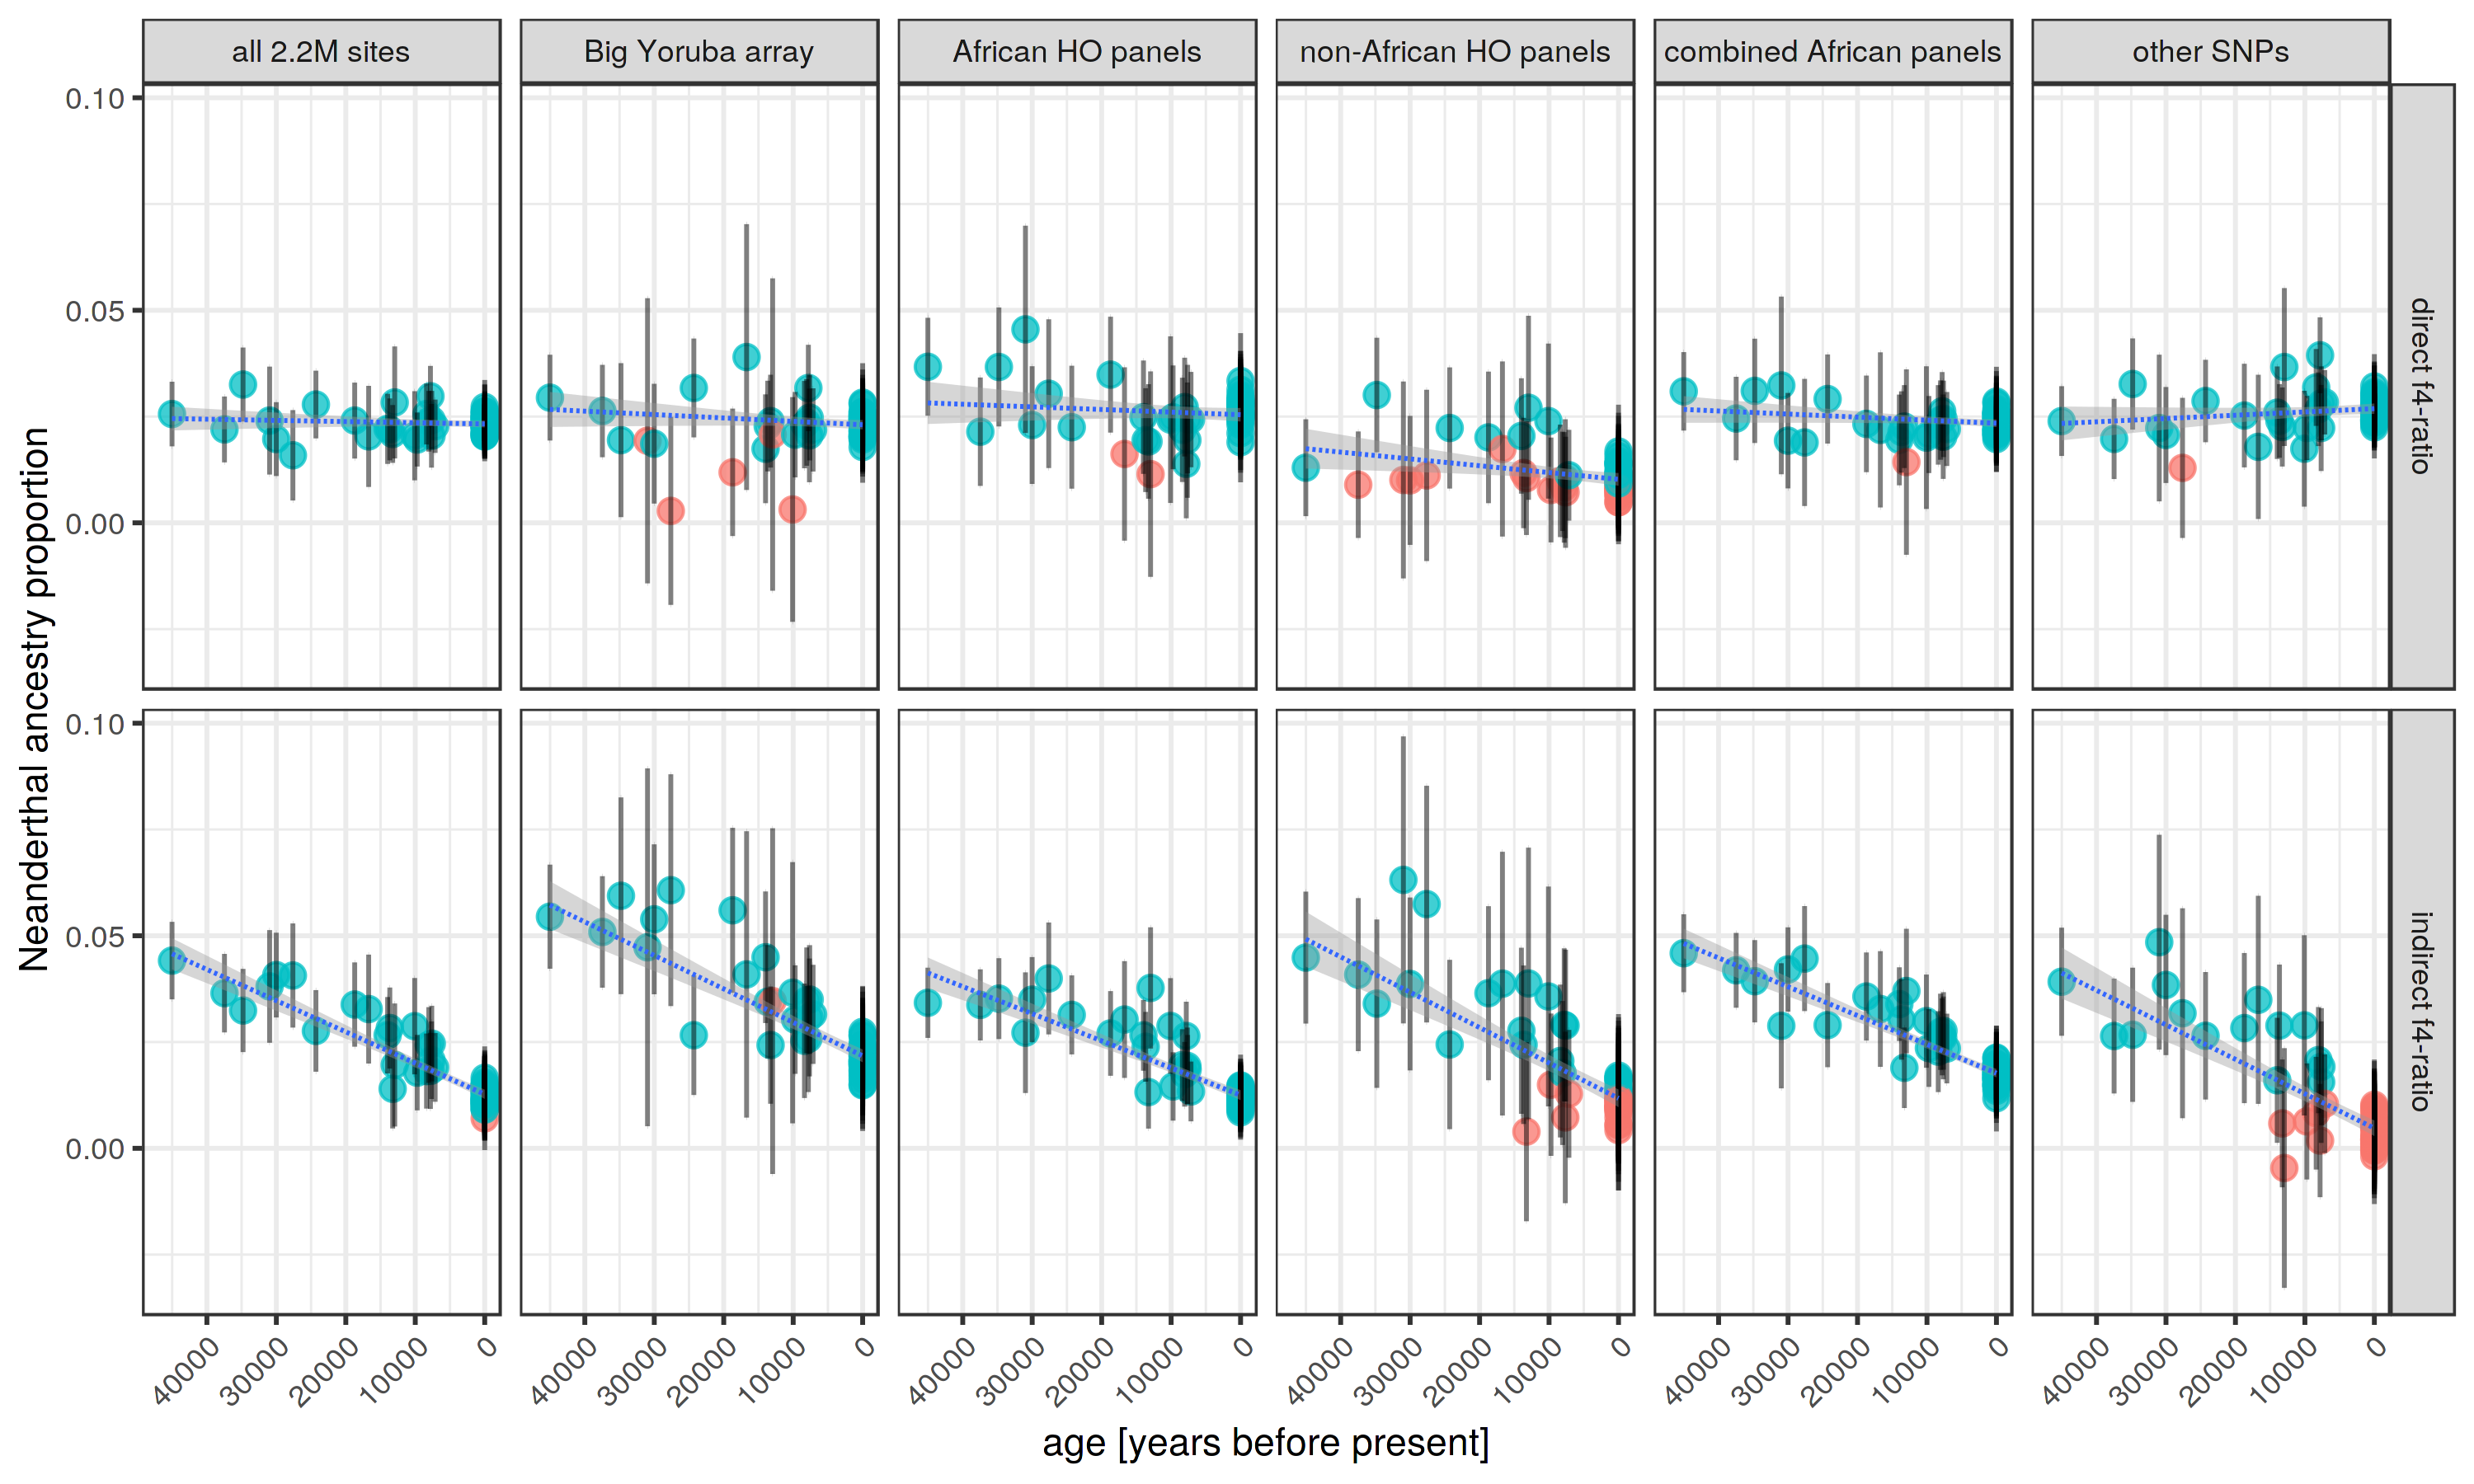

In [73]:
set_dim(10, 6, 300)

nea %>%
filter(
    sites != "bigyri_Altai",
    pop %in% c("EMH", "WestEurasia"),
    !X %in% near_east,
    X %in% sample_names
) %>%
mutate(sites = case_when(sites == "all" ~ "all 2.2M sites",
                         sites == "bigyri_YRI" ~ "Big Yoruba array",
                         sites == "afr_combined" ~ "combined African panels",
                         sites == "ho_afr" ~ "African HO panels",
                         sites == "ho_nonafr" ~ "non-African HO panels",
                         sites == "remainder" ~ "other SNPs")) %>%
mutate(sites = fct_relevel(sites, c("all 2.2M sites", "Big Yoruba array", "African HO panels",
                                    "non-African HO panels", "combined African panels", "other SNPs")),
       stat = str_replace(stat, "_f4", " f4-ratio")) %>%
{
ggplot(., aes(age, alpha)) +
    geom_point(aes(color = abs(Zscore) > 2), alpha=3/4, size=3) +
    geom_errorbar(aes(ymin=alpha - 2 * stderr, ymax=alpha + 2 * stderr), alpha = 1/2) +
    geom_smooth(aes(weight=snp_count), data=., method="lm", linetype=2, size=0.5) +
#    geom_smooth(aes(weight=snp_count), data=filter(., age > 15000), method="lm", linetype=2, size=0.5) +
#    geom_smooth(aes(weight=snp_count), data=filter(., age < 15000), color = "red", method="lm", linetype=2, size=0.5) +
    xlab("age [years before present]") + ylab("Neanderthal ancestry proportion") +
    xlim(47000, 0) +
    facet_grid(stat ~ sites) +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1))
}